## Load data


In [1]:
%matplotlib inline 
%reload_ext autoreload
from notebooks_commons import get_raw_data

# The first time we want to download the data from an index (might take a while!), 
# we should put the next parameter to True. Then, we can set it to False to read the saved
# data from the local pickle file.
load_from_db = False

def read_data(index):
    print "\nReading from index " + index
    pair = get_raw_data(index, load_from_db)
    rtx_runs = pair[0]
    data     = pair[1] 
    return rtx_runs, data


# Here we specify the name of the index to read data from

index_random_500 = "erik-gcp-random-rtx-new" 
index_novelty_500 = "erik-gcp-novelty-rtx-new-fixedeval"
index_nsga2_500 = "erik-gcp-nsga2-rtx-new"
index_mlr_500 = "erik-gcp-mlr-rtx-new" 

index_nsga2_500_new = "erik-gcp-nsga2-500cars-new-evo-params"

index_random_700 = "ilias-random-700cars" 
index_novelty_700 = "erik-gcp-novelty-rtx-new-fixedeval-700"
index_nsga2_700 = "erik-gcp-nsga2-700cars"
index_mlr_700 = "ilias-mlr-700cars" 

index_random_800 = "ilias-random-800cars" 
index_novelty_800 = "erik-gcp-novelty-rtx-new-fixedeval-800"
index_nsga2_800 = "erik-gcp-nsga2-800cars"
index_mlr_800 = "ilias-mlr-800cars" 


### Get Novelty data
novelty_rtx_runs_500, novelty_data_500 = read_data(index_novelty_500)
novelty_rtx_runs_700, novelty_data_700 = read_data(index_novelty_700)
novelty_rtx_runs_800, novelty_data_800 = read_data(index_novelty_800)

### Get NSGA2 data
nsga2_rtx_runs_500, nsga2_data_500 = read_data(index_nsga2_500)
nsga2_rtx_runs_700, nsga2_data_700 = read_data(index_nsga2_700)
nsga2_rtx_runs_800, nsga2_data_800 = read_data(index_nsga2_800)

### Get MLR data
mlr_rtx_runs_500, mlr_data_500 = read_data(index_mlr_500)
mlr_rtx_runs_700, mlr_data_700 = read_data(index_mlr_700)
mlr_rtx_runs_800, mlr_data_800 = read_data(index_mlr_800)

### Get RandomSearch data
random_rtx_runs_500, random_data_500 = read_data(index_random_500)
random_rtx_runs_700, random_data_700 = read_data(index_random_700)
random_rtx_runs_800, random_data_800 = read_data(index_random_800)



Reading from index erik-gcp-novelty-rtx-new-fixedeval
data retrieved from file raw_data/erik-gcp-novelty-rtx-new-fixedeval.pickle

Reading from index erik-gcp-novelty-rtx-new-fixedeval-700
data retrieved from file raw_data/erik-gcp-novelty-rtx-new-fixedeval-700.pickle

Reading from index erik-gcp-novelty-rtx-new-fixedeval-800
data retrieved from file raw_data/erik-gcp-novelty-rtx-new-fixedeval-800.pickle

Reading from index erik-gcp-nsga2-rtx-new
data retrieved from file raw_data/erik-gcp-nsga2-rtx-new.pickle

Reading from index erik-gcp-nsga2-700cars
data retrieved from file raw_data/erik-gcp-nsga2-700cars.pickle

Reading from index erik-gcp-nsga2-800cars
data retrieved from file raw_data/erik-gcp-nsga2-800cars.pickle

Reading from index erik-gcp-mlr-rtx-new
data retrieved from file raw_data/erik-gcp-mlr-rtx-new.pickle

Reading from index ilias-mlr-700cars
data retrieved from file raw_data/ilias-mlr-700cars.pickle

Reading from index ilias-mlr-800cars
data retrieved from file raw_dat

Text(0.5,0,u'routing cost')

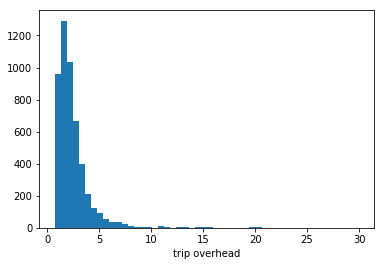

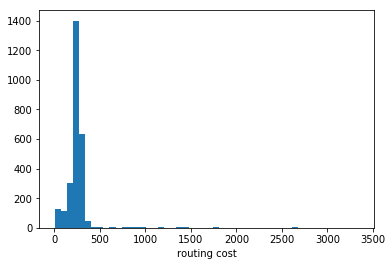

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=300)

# payload = random_data_800[3]["_source"]["payload"]
# payload = nsga2_data_800[6]["_source"]["payload"]
# payload = mlr_data_800[2]["_source"]["payload"]
payload = novelty_data_800[6]["_source"]["payload"]

routings = payload["routings"]
overheads = payload["overheads"]

fig,ax = plt.subplots()
plt.hist(overheads, bins=50)  
plt.xlabel('trip overhead')

fig,ax = plt.subplots()
plt.hist(routings, bins=50)  
plt.xlabel('routing cost')


## Check what's in there

In [2]:
import pprint
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
pp = pprint.PrettyPrinter(indent=4)

def check_data(rtx_runs, data):
    # sort according to seed 
    rtx_runs.sort(key=lambda d : d["seed"])
    if len(rtx_runs) > 0:
        try:
            opt_method = rtx_runs[0]["strategy"]["optimizer_method"]
        except:
            # mlr does not store the opt method name in field strategy.optimizer_method
            opt_method = "MLR"
    print "There were " + str(len(rtx_runs)) + " runs performed by " + opt_method

    for rtx_run in rtx_runs:
        data_for_run = [d for d in data if d["parent"] == rtx_run["id"]]
        data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
        printmd(str(len(data_for_run)) + "\t\t| seed " + str(rtx_run["seed"]) 
                + " | id " + str(rtx_run["id"]), "red")

        #for d in data_for_run:
        #    s = d["_source"]
        #    overheads = s["payload"]["overheads"]
        #    routings = s["payload"]["routings"]
        #    printmd("Iteration " + str(s["iteration"]) + ", individual " 
        #            + str(s["individual"]) + " with configuration", "blue")        
        #    pp.pprint(s["knobs"])
        #    printmd("has " + str(len(overheads)) + " overheads and " 
        #            + str(len(routings)) + " routings", "green")



# random search
check_data(random_rtx_runs_500, random_data_500)
check_data(random_rtx_runs_700, random_data_700)
check_data(random_rtx_runs_800, random_data_800)
    
# mlr
check_data(mlr_rtx_runs_500, mlr_data_500)
check_data(mlr_rtx_runs_700, mlr_data_700) 
check_data(mlr_rtx_runs_800, mlr_data_800)
    
# novelty
check_data(novelty_rtx_runs_500, novelty_data_500)
check_data(novelty_rtx_runs_700, novelty_data_700)
check_data(novelty_rtx_runs_800, novelty_data_800)

# nsga2
check_data(nsga2_rtx_runs_500, nsga2_data_500)
check_data(nsga2_rtx_runs_700, nsga2_data_700)
check_data(nsga2_rtx_runs_800, nsga2_data_800)


There were 30 runs performed by RandomSearch


<span style='color:red'>100		| seed 1 | id AWhR73FJ-DH7UHKUO47t</span>

<span style='color:red'>100		| seed 2 | id AWhR73FI-DH7UHKUO47s</span>

<span style='color:red'>100		| seed 3 | id AWhR73FJ-DH7UHKUO47u</span>

<span style='color:red'>100		| seed 4 | id AWhR732f-DH7UHKUO47v</span>

<span style='color:red'>100		| seed 5 | id AWhR75Fk-DH7UHKUO47w</span>

<span style='color:red'>100		| seed 6 | id AWhR76TF-DH7UHKUO47x</span>

<span style='color:red'>100		| seed 7 | id AWhR77iI-DH7UHKUO47y</span>

<span style='color:red'>100		| seed 8 | id AWhR78wb-DH7UHKUO47z</span>

<span style='color:red'>100		| seed 9 | id AWhR79_h-DH7UHKUO470</span>

<span style='color:red'>100		| seed 10 | id AWhR7_N6-DH7UHKUO471</span>

<span style='color:red'>100		| seed 11 | id AWhR8Ac9-DH7UHKUO472</span>

<span style='color:red'>100		| seed 12 | id AWhR8BrL-DH7UHKUO473</span>

<span style='color:red'>100		| seed 13 | id AWhR8C5q-DH7UHKUO474</span>

<span style='color:red'>100		| seed 14 | id AWhR8EHA-DH7UHKUO475</span>

<span style='color:red'>100		| seed 15 | id AWhR8FWD-DH7UHKUO476</span>

<span style='color:red'>100		| seed 16 | id AWhR7VbN-DH7UHKUO47f</span>

<span style='color:red'>100		| seed 19 | id AWhR7WD3-DH7UHKUO47g</span>

<span style='color:red'>100		| seed 20 | id AWhR7XSP-DH7UHKUO47h</span>

<span style='color:red'>100		| seed 21 | id AWhR7YfX-DH7UHKUO47i</span>

<span style='color:red'>100		| seed 22 | id AWhR7Zux-DH7UHKUO47j</span>

<span style='color:red'>100		| seed 23 | id AWhR7a8p-DH7UHKUO47k</span>

<span style='color:red'>100		| seed 24 | id AWhR7cKo-DH7UHKUO47l</span>

<span style='color:red'>100		| seed 25 | id AWhR7dZF-DH7UHKUO47m</span>

<span style='color:red'>100		| seed 26 | id AWhR7eoz-DH7UHKUO47n</span>

<span style='color:red'>100		| seed 27 | id AWhR7f20-DH7UHKUO47o</span>

<span style='color:red'>100		| seed 28 | id AWhR7hE5-DH7UHKUO47p</span>

<span style='color:red'>100		| seed 29 | id AWhR7iS5-DH7UHKUO47q</span>

<span style='color:red'>100		| seed 30 | id AWhR7jhn-DH7UHKUO47r</span>

<span style='color:red'>100		| seed 31 | id AWhXjJgDMEaT9KPS2740</span>

<span style='color:red'>100		| seed 32 | id AWhXjL9EMEaT9KPS276e</span>

There were 30 runs performed by RandomSearch


<span style='color:red'>100		| seed 1 | id AWheBJc4MEaT9KPS7ajE</span>

<span style='color:red'>100		| seed 2 | id AWheBKoKMEaT9KPS7ajF</span>

<span style='color:red'>100		| seed 3 | id AWhmxS4_MEaT9KPSB_pQ</span>

<span style='color:red'>100		| seed 4 | id AWheBNGZMEaT9KPS7ak1</span>

<span style='color:red'>100		| seed 5 | id AWheBOTXMEaT9KPS7amk</span>

<span style='color:red'>100		| seed 6 | id AWheBPhdMEaT9KPS7aml</span>

<span style='color:red'>100		| seed 7 | id AWheBQwhMEaT9KPS7aoU</span>

<span style='color:red'>100		| seed 8 | id AWheBR-aMEaT9KPS7aoV</span>

<span style='color:red'>100		| seed 9 | id AWheBTMOMEaT9KPS7aqE</span>

<span style='color:red'>100		| seed 10 | id AWheBUbHMEaT9KPS7aqF</span>

<span style='color:red'>100		| seed 11 | id AWheBVp9MEaT9KPS7ar0</span>

<span style='color:red'>100		| seed 12 | id AWheBW5yMEaT9KPS7ar1</span>

<span style='color:red'>100		| seed 13 | id AWheBYFoMEaT9KPS7atk</span>

<span style='color:red'>100		| seed 14 | id AWheBZXMMEaT9KPS7atm</span>

<span style='color:red'>100		| seed 15 | id AWheBakJMEaT9KPS7avU</span>

<span style='color:red'>100		| seed 16 | id AWhiA0FsMEaT9KPS-UtS</span>

<span style='color:red'>100		| seed 17 | id AWhiA0wMMEaT9KPS-UvH</span>

<span style='color:red'>100		| seed 18 | id AWhiA19-MEaT9KPS-UvJ</span>

<span style='color:red'>100		| seed 19 | id AWhiA3MAMEaT9KPS-Uw-</span>

<span style='color:red'>100		| seed 20 | id AWhiA4ZWMEaT9KPS-UxA</span>

<span style='color:red'>100		| seed 21 | id AWhiA5nFMEaT9KPS-Uy1</span>

<span style='color:red'>100		| seed 22 | id AWhiA62OMEaT9KPS-Uy3</span>

<span style='color:red'>100		| seed 23 | id AWhiA8HZMEaT9KPS-U0s</span>

<span style='color:red'>100		| seed 24 | id AWhiA9SiMEaT9KPS-U0u</span>

<span style='color:red'>100		| seed 25 | id AWhiA-hNMEaT9KPS-U2j</span>

<span style='color:red'>100		| seed 26 | id AWhmxoNlMEaT9KPSB_6a</span>

<span style='color:red'>100		| seed 27 | id AWhiBA-HMEaT9KPS-U4a</span>

<span style='color:red'>100		| seed 28 | id AWhiBCNxMEaT9KPS-U4c</span>

<span style='color:red'>100		| seed 29 | id AWhiBDcvMEaT9KPS-U6R</span>

<span style='color:red'>100		| seed 30 | id AWhiBEqnMEaT9KPS-U6T</span>

There were 30 runs performed by RandomSearch


<span style='color:red'>100		| seed 1 | id AWhmzyCuMEaT9KPSCBlN</span>

<span style='color:red'>100		| seed 2 | id AWhmzzRTMEaT9KPSCBnI</span>

<span style='color:red'>100		| seed 3 | id AWhqbpOpMEaT9KPSE7ue</span>

<span style='color:red'>100		| seed 4 | id AWhmz1ssMEaT9KPSCBpF</span>

<span style='color:red'>100		| seed 5 | id AWhmz28kMEaT9KPSCBpH</span>

<span style='color:red'>100		| seed 6 | id AWhmz4IxMEaT9KPSCBrC</span>

<span style='color:red'>100		| seed 7 | id AWhmz5YCMEaT9KPSCBrE</span>

<span style='color:red'>100		| seed 8 | id AWhmz6owMEaT9KPSCBs_</span>

<span style='color:red'>100		| seed 9 | id AWhmz71HMEaT9KPSCBtB</span>

<span style='color:red'>100		| seed 10 | id AWhmz9CgMEaT9KPSCBu8</span>

<span style='color:red'>100		| seed 11 | id AWhmz-UeMEaT9KPSCBu-</span>

<span style='color:red'>100		| seed 12 | id AWhmz_hTMEaT9KPSCBw5</span>

<span style='color:red'>100		| seed 13 | id AWhm0AxOMEaT9KPSCBw7</span>

<span style='color:red'>100		| seed 14 | id AWhm0B7gMEaT9KPSCBy2</span>

<span style='color:red'>100		| seed 15 | id AWhm0DO7MEaT9KPSCBy4</span>

<span style='color:red'>100		| seed 16 | id AWhqbvhuMEaT9KPSE70b</span>

<span style='color:red'>100		| seed 17 | id AWhqbwv6MEaT9KPSE70d</span>

<span style='color:red'>100		| seed 18 | id AWhqbx-HMEaT9KPSE72c</span>

<span style='color:red'>100		| seed 19 | id AWhqbzOtMEaT9KPSE72e</span>

<span style='color:red'>100		| seed 20 | id AWhqb0bYMEaT9KPSE74d</span>

<span style='color:red'>100		| seed 21 | id AWhqb1paMEaT9KPSE74f</span>

<span style='color:red'>100		| seed 22 | id AWhv7DGSMEaT9KPSJd12</span>

<span style='color:red'>100		| seed 23 | id AWhqb4HwMEaT9KPSE76g</span>

<span style='color:red'>100		| seed 24 | id AWhqb5Y3MEaT9KPSE78g</span>

<span style='color:red'>100		| seed 25 | id AWhqb6l0MEaT9KPSE78h</span>

<span style='color:red'>100		| seed 26 | id AWhqb7wpMEaT9KPSE7-g</span>

<span style='color:red'>100		| seed 27 | id AWhqb9BfMEaT9KPSE7-i</span>

<span style='color:red'>100		| seed 28 | id AWhqb-N5MEaT9KPSE8Ah</span>

<span style='color:red'>100		| seed 29 | id AWhqb_cjMEaT9KPSE8Aj</span>

<span style='color:red'>100		| seed 30 | id AWhqcAxwMEaT9KPSE8Cj</span>

There were 30 runs performed by MLR


<span style='color:red'>100		| seed 1 | id AWhN1f_9-DH7UHKUO45q</span>

<span style='color:red'>100		| seed 4 | id AWhN1gu1-DH7UHKUO45r</span>

<span style='color:red'>100		| seed 5 | id AWhN1h9g-DH7UHKUO45s</span>

<span style='color:red'>100		| seed 6 | id AWhN1jL0-DH7UHKUO45t</span>

<span style='color:red'>100		| seed 7 | id AWhN1kY--DH7UHKUO45u</span>

<span style='color:red'>100		| seed 8 | id AWhN1loj-DH7UHKUO45v</span>

<span style='color:red'>100		| seed 9 | id AWhN1m2p-DH7UHKUO45w</span>

<span style='color:red'>100		| seed 10 | id AWhN1oEJ-DH7UHKUO45x</span>

<span style='color:red'>100		| seed 11 | id AWhN1pUm-DH7UHKUO45y</span>

<span style='color:red'>100		| seed 12 | id AWhN1qh_-DH7UHKUO45z</span>

<span style='color:red'>100		| seed 13 | id AWhN1rwQ-DH7UHKUO450</span>

<span style='color:red'>100		| seed 14 | id AWhN1s-t-DH7UHKUO451</span>

<span style='color:red'>100		| seed 15 | id AWhN1uNJ-DH7UHKUO452</span>

<span style='color:red'>100		| seed 16 | id AWhPQTve-DH7UHKUO46S</span>

<span style='color:red'>100		| seed 17 | id AWhPQU8w-DH7UHKUO46T</span>

<span style='color:red'>100		| seed 18 | id AWhPQWMT-DH7UHKUO46U</span>

<span style='color:red'>100		| seed 19 | id AWhPQXZm-DH7UHKUO46V</span>

<span style='color:red'>100		| seed 20 | id AWhPQYoN-DH7UHKUO46W</span>

<span style='color:red'>100		| seed 21 | id AWhPQZ2f-DH7UHKUO46X</span>

<span style='color:red'>100		| seed 22 | id AWhPQbEt-DH7UHKUO46Y</span>

<span style='color:red'>100		| seed 23 | id AWhPQcTv-DH7UHKUO46Z</span>

<span style='color:red'>100		| seed 24 | id AWhPQdiS-DH7UHKUO46a</span>

<span style='color:red'>100		| seed 25 | id AWhPQexj-DH7UHKUO46b</span>

<span style='color:red'>100		| seed 26 | id AWhPQf_Z-DH7UHKUO46c</span>

<span style='color:red'>100		| seed 27 | id AWhPQhMp-DH7UHKUO46d</span>

<span style='color:red'>100		| seed 28 | id AWhPQia9-DH7UHKUO46e</span>

<span style='color:red'>100		| seed 29 | id AWhPQjp0-DH7UHKUO46f</span>

<span style='color:red'>100		| seed 30 | id AWhPQk4M-DH7UHKUO46g</span>

<span style='color:red'>100		| seed 31 | id AWhXka0-MEaT9KPS28wn</span>

<span style='color:red'>100		| seed 32 | id AWhXka0-MEaT9KPS28wo</span>

There were 30 runs performed by MLR


<span style='color:red'>100		| seed 1 | id AWhNAWdx-DH7UHKUO44x</span>

<span style='color:red'>100		| seed 2 | id AWhNAXsq-DH7UHKUO44y</span>

<span style='color:red'>100		| seed 3 | id AWhNAY5r-DH7UHKUO44z</span>

<span style='color:red'>100		| seed 4 | id AWhNAaH6-DH7UHKUO440</span>

<span style='color:red'>100		| seed 5 | id AWhNAbWc-DH7UHKUO441</span>

<span style='color:red'>100		| seed 6 | id AWhNAck_-DH7UHKUO442</span>

<span style='color:red'>100		| seed 7 | id AWhNAdz2-DH7UHKUO443</span>

<span style='color:red'>100		| seed 8 | id AWhNAfCi-DH7UHKUO444</span>

<span style='color:red'>100		| seed 9 | id AWhNAgQf-DH7UHKUO445</span>

<span style='color:red'>100		| seed 10 | id AWhNAhdy-DH7UHKUO446</span>

<span style='color:red'>100		| seed 11 | id AWhNAivZ-DH7UHKUO447</span>

<span style='color:red'>100		| seed 12 | id AWhNAj_L-DH7UHKUO448</span>

<span style='color:red'>100		| seed 13 | id AWhNAlKf-DH7UHKUO449</span>

<span style='color:red'>100		| seed 14 | id AWhNAmhq-DH7UHKUO44-</span>

<span style='color:red'>100		| seed 15 | id AWhNAnqc-DH7UHKUO44_</span>

<span style='color:red'>100		| seed 16 | id AWhSp5d3-DH7UHKUO48d</span>

<span style='color:red'>100		| seed 17 | id AWhSp6qO-DH7UHKUO48e</span>

<span style='color:red'>100		| seed 18 | id AWhSp746-DH7UHKUO48f</span>

<span style='color:red'>100		| seed 19 | id AWhSp9IR-DH7UHKUO48g</span>

<span style='color:red'>100		| seed 20 | id AWhSp-Wt-DH7UHKUO48h</span>

<span style='color:red'>100		| seed 21 | id AWhSp_kY-DH7UHKUO48i</span>

<span style='color:red'>100		| seed 22 | id AWhSqAyz-DH7UHKUO48j</span>

<span style='color:red'>100		| seed 23 | id AWhSqCAK-DH7UHKUO48k</span>

<span style='color:red'>100		| seed 24 | id AWhSqDQ0-DH7UHKUO48l</span>

<span style='color:red'>100		| seed 25 | id AWhSqEfK-DH7UHKUO48m</span>

<span style='color:red'>100		| seed 26 | id AWhSqFuF-DH7UHKUO48n</span>

<span style='color:red'>100		| seed 27 | id AWhSqG8e-DH7UHKUO48o</span>

<span style='color:red'>100		| seed 28 | id AWhSqIK0-DH7UHKUO48p</span>

<span style='color:red'>100		| seed 29 | id AWhSqJYJ-DH7UHKUO48q</span>

<span style='color:red'>100		| seed 30 | id AWhSqKn7-DH7UHKUO48r</span>

There were 30 runs performed by MLR


<span style='color:red'>100		| seed 1 | id AWhXIveTMEaT9KPS2qPW</span>

<span style='color:red'>100		| seed 2 | id AWhXIwpFMEaT9KPS2qQ-</span>

<span style='color:red'>100		| seed 3 | id AWhXIx4GMEaT9KPS2qRA</span>

<span style='color:red'>100		| seed 4 | id AWhXIzF4MEaT9KPS2qSo</span>

<span style='color:red'>100		| seed 5 | id AWhXI0UlMEaT9KPS2qSq</span>

<span style='color:red'>100		| seed 6 | id AWhXI1iEMEaT9KPS2qUS</span>

<span style='color:red'>100		| seed 7 | id AWhXI2wXMEaT9KPS2qUU</span>

<span style='color:red'>100		| seed 8 | id AWhXI3-_MEaT9KPS2qV8</span>

<span style='color:red'>100		| seed 9 | id AWhXI5NuMEaT9KPS2qV-</span>

<span style='color:red'>100		| seed 10 | id AWhXI6chMEaT9KPS2qXm</span>

<span style='color:red'>100		| seed 11 | id AWhXI7shMEaT9KPS2qXo</span>

<span style='color:red'>100		| seed 12 | id AWhXI866MEaT9KPS2qZR</span>

<span style='color:red'>100		| seed 13 | id AWhXI-IfMEaT9KPS2qZS</span>

<span style='color:red'>100		| seed 14 | id AWhXI_XTMEaT9KPS2qa7</span>

<span style='color:red'>100		| seed 15 | id AWhXJAnzMEaT9KPS2qa8</span>

<span style='color:red'>100		| seed 16 | id AWhbBvQ0MEaT9KPS5U_G</span>

<span style='color:red'>100		| seed 17 | id AWhbBwfPMEaT9KPS5VA0</span>

<span style='color:red'>100		| seed 18 | id AWhbBxuOMEaT9KPS5VA1</span>

<span style='color:red'>100		| seed 19 | id AWhbBy70MEaT9KPS5VCj</span>

<span style='color:red'>100		| seed 20 | id AWhbB0J-MEaT9KPS5VCk</span>

<span style='color:red'>100		| seed 21 | id AWhbB1YiMEaT9KPS5VES</span>

<span style='color:red'>100		| seed 22 | id AWhbB2mwMEaT9KPS5VET</span>

<span style='color:red'>100		| seed 23 | id AWhbB32jMEaT9KPS5VGB</span>

<span style='color:red'>100		| seed 24 | id AWhbB5DSMEaT9KPS5VGC</span>

<span style='color:red'>100		| seed 25 | id AWhbB6ShMEaT9KPS5VHw</span>

<span style='color:red'>100		| seed 26 | id AWhbB7fOMEaT9KPS5VHx</span>

<span style='color:red'>100		| seed 27 | id AWhbB8tfMEaT9KPS5VJf</span>

<span style='color:red'>100		| seed 28 | id AWhbB9-aMEaT9KPS5VJg</span>

<span style='color:red'>100		| seed 29 | id AWhbB_MBMEaT9KPS5VLO</span>

<span style='color:red'>100		| seed 30 | id AWhbCAfAMEaT9KPS5VLP</span>

There were 30 runs performed by NoveltySearch


<span style='color:red'>100		| seed 1 | id AWhhiEOmMEaT9KPS99sJ</span>

<span style='color:red'>100		| seed 2 | id AWhhiFaGMEaT9KPS99t-</span>

<span style='color:red'>100		| seed 3 | id AWhhiGoVMEaT9KPS99t_</span>

<span style='color:red'>100		| seed 4 | id AWhhiH2TMEaT9KPS99v0</span>

<span style='color:red'>100		| seed 5 | id AWhhiJE6MEaT9KPS99v1</span>

<span style='color:red'>100		| seed 6 | id AWhhiKTHMEaT9KPS99xq</span>

<span style='color:red'>100		| seed 7 | id AWhhiLhmMEaT9KPS99xr</span>

<span style='color:red'>100		| seed 8 | id AWhhiMutMEaT9KPS99zg</span>

<span style='color:red'>100		| seed 9 | id AWhhiN9zMEaT9KPS99zh</span>

<span style='color:red'>100		| seed 10 | id AWhhiPN7MEaT9KPS991W</span>

<span style='color:red'>100		| seed 11 | id AWhhiQcTMEaT9KPS991X</span>

<span style='color:red'>100		| seed 12 | id AWhhiRq7MEaT9KPS993M</span>

<span style='color:red'>100		| seed 13 | id AWhhiS4lMEaT9KPS993N</span>

<span style='color:red'>100		| seed 14 | id AWhhiUHLMEaT9KPS995C</span>

<span style='color:red'>100		| seed 15 | id AWhhiVVOMEaT9KPS995D</span>

<span style='color:red'>100		| seed 16 | id AWhhjABLMEaT9KPS9-Zs</span>

<span style='color:red'>100		| seed 17 | id AWhhjAIsMEaT9KPS9-Zt</span>

<span style='color:red'>100		| seed 18 | id AWhhjClBMEaT9KPS9-bi</span>

<span style='color:red'>100		| seed 19 | id AWhhjFBoMEaT9KPS9-dX</span>

<span style='color:red'>100		| seed 20 | id AWhhjHduMEaT9KPS9-fM</span>

<span style='color:red'>100		| seed 21 | id AWhhjJ62MEaT9KPS9-hB</span>

<span style='color:red'>100		| seed 22 | id AWhhjMXcMEaT9KPS9-i2</span>

<span style='color:red'>100		| seed 23 | id AWhhjOzaMEaT9KPS9-kr</span>

<span style='color:red'>100		| seed 24 | id AWhhjRPzMEaT9KPS9-mg</span>

<span style='color:red'>100		| seed 25 | id AWhhjTtZMEaT9KPS9-oV</span>

<span style='color:red'>100		| seed 26 | id AWhhjWJTMEaT9KPS9-qK</span>

<span style='color:red'>100		| seed 27 | id AWhhjYmBMEaT9KPS9-r_</span>

<span style='color:red'>100		| seed 28 | id AWhhjbCuMEaT9KPS9-t0</span>

<span style='color:red'>100		| seed 29 | id AWhhjdfeMEaT9KPS9-vp</span>

<span style='color:red'>100		| seed 30 | id AWhhjf7hMEaT9KPS9-xe</span>

There were 30 runs performed by NoveltySearch


<span style='color:red'>100		| seed 1 | id AWhhlwXmMEaT9KPS-Ac1</span>

<span style='color:red'>100		| seed 2 | id AWhhlyz5MEaT9KPS-Aes</span>

<span style='color:red'>100		| seed 3 | id AWhhl1QgMEaT9KPS-Agi</span>

<span style='color:red'>100		| seed 4 | id AWhhl3szMEaT9KPS-AiY</span>

<span style='color:red'>100		| seed 5 | id AWhhl6JwMEaT9KPS-AkO</span>

<span style='color:red'>100		| seed 6 | id AWhhl8lvMEaT9KPS-AmE</span>

<span style='color:red'>100		| seed 7 | id AWhhl_C8MEaT9KPS-An6</span>

<span style='color:red'>100		| seed 8 | id AWhhmBfdMEaT9KPS-Apw</span>

<span style='color:red'>100		| seed 9 | id AWhhmD7yMEaT9KPS-Arm</span>

<span style='color:red'>100		| seed 10 | id AWhhmGYWMEaT9KPS-Atc</span>

<span style='color:red'>100		| seed 11 | id AWhhmI05MEaT9KPS-AvS</span>

<span style='color:red'>100		| seed 12 | id AWhhmLRIMEaT9KPS-AxI</span>

<span style='color:red'>100		| seed 13 | id AWhhmNuNMEaT9KPS-Ay-</span>

<span style='color:red'>100		| seed 14 | id AWhhmQKTMEaT9KPS-A00</span>

<span style='color:red'>100		| seed 15 | id AWhhmSnxMEaT9KPS-A2q</span>

<span style='color:red'>100		| seed 16 | id AWhkLuleMEaT9KPS_-ZR</span>

<span style='color:red'>100		| seed 17 | id AWhkLu07MEaT9KPS_-ZS</span>

<span style='color:red'>100		| seed 18 | id AWhkLxRHMEaT9KPS_-bM</span>

<span style='color:red'>100		| seed 19 | id AWhkLzuLMEaT9KPS_-dG</span>

<span style='color:red'>100		| seed 20 | id AWhkL2KrMEaT9KPS_-fA</span>

<span style='color:red'>100		| seed 21 | id AWhkL4m-MEaT9KPS_-g6</span>

<span style='color:red'>100		| seed 22 | id AWhkL7DpMEaT9KPS_-i0</span>

<span style='color:red'>100		| seed 23 | id AWhkL9hXMEaT9KPS_-ku</span>

<span style='color:red'>100		| seed 24 | id AWhkL_9CMEaT9KPS_-mo</span>

<span style='color:red'>100		| seed 25 | id AWhkMCZuMEaT9KPS_-oi</span>

<span style='color:red'>100		| seed 26 | id AWhkME2AMEaT9KPS_-qc</span>

<span style='color:red'>100		| seed 27 | id AWhkMHSiMEaT9KPS_-sW</span>

<span style='color:red'>100		| seed 28 | id AWhkMJvVMEaT9KPS_-uQ</span>

<span style='color:red'>100		| seed 29 | id AWhkMML7MEaT9KPS_-wK</span>

<span style='color:red'>100		| seed 30 | id AWhkMOolMEaT9KPS_-yE</span>

There were 30 runs performed by NoveltySearch


<span style='color:red'>100		| seed 3 | id AWhkQuW3MEaT9KPSACRL</span>

<span style='color:red'>100		| seed 4 | id AWhkQu3UMEaT9KPSACRM</span>

<span style='color:red'>100		| seed 5 | id AWhkQwFbMEaT9KPSACTH</span>

<span style='color:red'>100		| seed 6 | id AWhkQxU6MEaT9KPSACTI</span>

<span style='color:red'>100		| seed 7 | id AWhkQyjNMEaT9KPSACVD</span>

<span style='color:red'>100		| seed 8 | id AWhkQzxxMEaT9KPSACVE</span>

<span style='color:red'>100		| seed 9 | id AWhkQ0_PMEaT9KPSACW_</span>

<span style='color:red'>100		| seed 10 | id AWhkQ2NXMEaT9KPSACXA</span>

<span style='color:red'>100		| seed 11 | id AWhkQ3cOMEaT9KPSACY7</span>

<span style='color:red'>100		| seed 12 | id AWhkQ4roMEaT9KPSACY8</span>

<span style='color:red'>100		| seed 13 | id AWhkQ55MMEaT9KPSACa3</span>

<span style='color:red'>100		| seed 14 | id AWhkQ7HsMEaT9KPSACa4</span>

<span style='color:red'>100		| seed 15 | id AWhkQ8VbMEaT9KPSACcz</span>

<span style='color:red'>100		| seed 16 | id AWhkRnD-MEaT9KPSAC9O</span>

<span style='color:red'>100		| seed 17 | id AWhkRnEBMEaT9KPSAC9P</span>

<span style='color:red'>100		| seed 18 | id AWhkRpQJMEaT9KPSAC_K</span>

<span style='color:red'>100		| seed 19 | id AWhkRrsnMEaT9KPSADBF</span>

<span style='color:red'>100		| seed 20 | id AWhkRuJRMEaT9KPSADDA</span>

<span style='color:red'>100		| seed 21 | id AWhkRwlbMEaT9KPSADE7</span>

<span style='color:red'>100		| seed 22 | id AWhkRzB4MEaT9KPSADG2</span>

<span style='color:red'>100		| seed 23 | id AWhkR1egMEaT9KPSADIx</span>

<span style='color:red'>100		| seed 24 | id AWhkR37QMEaT9KPSADKs</span>

<span style='color:red'>100		| seed 25 | id AWhkR6YaMEaT9KPSADMn</span>

<span style='color:red'>100		| seed 26 | id AWhkR80iMEaT9KPSADOi</span>

<span style='color:red'>100		| seed 27 | id AWhkR_QUMEaT9KPSADQd</span>

<span style='color:red'>100		| seed 28 | id AWhkSBtSMEaT9KPSADSY</span>

<span style='color:red'>100		| seed 29 | id AWhkSEJ4MEaT9KPSADUT</span>

<span style='color:red'>100		| seed 30 | id AWhkSGmqMEaT9KPSADWO</span>

<span style='color:red'>100		| seed 31 | id AWhnSztcMEaT9KPSCaCO</span>

<span style='color:red'>100		| seed 32 | id AWhnSz3xMEaT9KPSCaCP</span>

There were 30 runs performed by NSGAII


<span style='color:red'>100		| seed 1 | id AWhNw5Ve-DH7UHKUO45L</span>

<span style='color:red'>100		| seed 2 | id AWhNw6gr-DH7UHKUO45M</span>

<span style='color:red'>100		| seed 3 | id AWhNw7vv-DH7UHKUO45N</span>

<span style='color:red'>100		| seed 4 | id AWhNw88--DH7UHKUO45O</span>

<span style='color:red'>100		| seed 5 | id AWhNw-ME-DH7UHKUO45P</span>

<span style='color:red'>100		| seed 6 | id AWhNw_Zj-DH7UHKUO45Q</span>

<span style='color:red'>100		| seed 7 | id AWhNxAoU-DH7UHKUO45R</span>

<span style='color:red'>100		| seed 8 | id AWhNxB27-DH7UHKUO45S</span>

<span style='color:red'>100		| seed 9 | id AWhNxDGH-DH7UHKUO45T</span>

<span style='color:red'>100		| seed 10 | id AWhNxEUs-DH7UHKUO45U</span>

<span style='color:red'>100		| seed 11 | id AWhNxFig-DH7UHKUO45V</span>

<span style='color:red'>100		| seed 12 | id AWhNxGxM-DH7UHKUO45W</span>

<span style='color:red'>100		| seed 13 | id AWhNxH_5-DH7UHKUO45X</span>

<span style='color:red'>100		| seed 14 | id AWhNxJN3-DH7UHKUO45Y</span>

<span style='color:red'>100		| seed 15 | id AWhNxKb2-DH7UHKUO45Z</span>

<span style='color:red'>100		| seed 16 | id AWhSmGCB-DH7UHKUO48M</span>

<span style='color:red'>100		| seed 17 | id AWhdV6MeMEaT9KPS68Wc</span>

<span style='color:red'>100		| seed 18 | id AWhdV6McMEaT9KPS68Wb</span>

<span style='color:red'>100		| seed 19 | id AWhSmHWm-DH7UHKUO48P</span>

<span style='color:red'>100		| seed 20 | id AWhSmIk1-DH7UHKUO48Q</span>

<span style='color:red'>100		| seed 21 | id AWhSmJzp-DH7UHKUO48R</span>

<span style='color:red'>100		| seed 22 | id AWhSmLB6-DH7UHKUO48S</span>

<span style='color:red'>100		| seed 23 | id AWhSmMQK-DH7UHKUO48T</span>

<span style='color:red'>100		| seed 24 | id AWhSmNeF-DH7UHKUO48U</span>

<span style='color:red'>100		| seed 25 | id AWhSmOtd-DH7UHKUO48V</span>

<span style='color:red'>100		| seed 26 | id AWhSmP73-DH7UHKUO48W</span>

<span style='color:red'>100		| seed 27 | id AWhSmRKx-DH7UHKUO48X</span>

<span style='color:red'>100		| seed 28 | id AWhSmSY0-DH7UHKUO48Y</span>

<span style='color:red'>100		| seed 29 | id AWhSmTnT-DH7UHKUO48Z</span>

<span style='color:red'>100		| seed 30 | id AWhSmU1D-DH7UHKUO48a</span>

There were 30 runs performed by NSGAII


<span style='color:red'>100		| seed 1 | id AWhnWUWIMEaT9KPSCc0I</span>

<span style='color:red'>100		| seed 2 | id AWhnWWy9MEaT9KPSCc2F</span>

<span style='color:red'>100		| seed 3 | id AWhnWZOfMEaT9KPSCc4C</span>

<span style='color:red'>100		| seed 4 | id AWhnWbrmMEaT9KPSCc5_</span>

<span style='color:red'>100		| seed 5 | id AWhnWeH9MEaT9KPSCc78</span>

<span style='color:red'>100		| seed 6 | id AWhnWgj7MEaT9KPSCc95</span>

<span style='color:red'>100		| seed 7 | id AWhnWjB1MEaT9KPSCc_2</span>

<span style='color:red'>100		| seed 8 | id AWhnWleBMEaT9KPSCdBz</span>

<span style='color:red'>100		| seed 9 | id AWhnWn5oMEaT9KPSCdDy</span>

<span style='color:red'>100		| seed 10 | id AWhnWqWlMEaT9KPSCdFw</span>

<span style='color:red'>100		| seed 11 | id AWhnWszNMEaT9KPSCdHu</span>

<span style='color:red'>100		| seed 12 | id AWhnWvQEMEaT9KPSCdJs</span>

<span style='color:red'>100		| seed 13 | id AWhnWxsgMEaT9KPSCdLq</span>

<span style='color:red'>100		| seed 14 | id AWhnW0JEMEaT9KPSCdNo</span>

<span style='color:red'>100		| seed 15 | id AWhnW2lyMEaT9KPSCdPm</span>

<span style='color:red'>100		| seed 16 | id AWhnWmGwMEaT9KPSCdB0</span>

<span style='color:red'>100		| seed 17 | id AWhnWmWLMEaT9KPSCdB1</span>

<span style='color:red'>100		| seed 18 | id AWhnWozOMEaT9KPSCdDz</span>

<span style='color:red'>100		| seed 19 | id AWhnWrPnMEaT9KPSCdFx</span>

<span style='color:red'>100		| seed 20 | id AWhnWtrIMEaT9KPSCdHv</span>

<span style='color:red'>100		| seed 21 | id AWhnWwI7MEaT9KPSCdJt</span>

<span style='color:red'>100		| seed 22 | id AWhnWykbMEaT9KPSCdLr</span>

<span style='color:red'>100		| seed 23 | id AWhnW1BqMEaT9KPSCdNp</span>

<span style='color:red'>100		| seed 24 | id AWhnW3d3MEaT9KPSCdPn</span>

<span style='color:red'>100		| seed 25 | id AWhnW563MEaT9KPSCdRk</span>

<span style='color:red'>100		| seed 26 | id AWhnW8W_MEaT9KPSCdTh</span>

<span style='color:red'>100		| seed 27 | id AWhnW-zvMEaT9KPSCdVe</span>

<span style='color:red'>100		| seed 28 | id AWhnXBQnMEaT9KPSCdXb</span>

<span style='color:red'>100		| seed 29 | id AWhnXDsjMEaT9KPSCdZY</span>

<span style='color:red'>100		| seed 30 | id AWhnXGJpMEaT9KPSCdbV</span>

There were 30 runs performed by NSGAII


<span style='color:red'>100		| seed 2 | id AWhrklBPMEaT9KPSF3A1</span>

<span style='color:red'>100		| seed 3 | id AWhrkm6CMEaT9KPSF3C2</span>

<span style='color:red'>100		| seed 4 | id AWhrkpVGMEaT9KPSF3E3</span>

<span style='color:red'>100		| seed 5 | id AWhrkryYMEaT9KPSF3G4</span>

<span style='color:red'>100		| seed 6 | id AWhrkuOQMEaT9KPSF3I5</span>

<span style='color:red'>100		| seed 7 | id AWhrkwrjMEaT9KPSF3K6</span>

<span style='color:red'>100		| seed 8 | id AWhrkzHPMEaT9KPSF3M7</span>

<span style='color:red'>100		| seed 9 | id AWhrk1kaMEaT9KPSF3O8</span>

<span style='color:red'>100		| seed 10 | id AWhrk4ANMEaT9KPSF3Q9</span>

<span style='color:red'>100		| seed 11 | id AWhrk6d7MEaT9KPSF3S-</span>

<span style='color:red'>100		| seed 12 | id AWhrk849MEaT9KPSF3U_</span>

<span style='color:red'>100		| seed 13 | id AWhrk_XZMEaT9KPSF3XA</span>

<span style='color:red'>100		| seed 14 | id AWhrlBzHMEaT9KPSF3ZB</span>

<span style='color:red'>100		| seed 15 | id AWhrlEOtMEaT9KPSF3bC</span>

<span style='color:red'>100		| seed 16 | id AWhrlLVUMEaT9KPSF3hD</span>

<span style='color:red'>100		| seed 17 | id AWhrlLVfMEaT9KPSF3hE</span>

<span style='color:red'>100		| seed 18 | id AWhrlNyDMEaT9KPSF3jF</span>

<span style='color:red'>100		| seed 19 | id AWhrlQN0MEaT9KPSF3lG</span>

<span style='color:red'>100		| seed 20 | id AWhrlSqpMEaT9KPSF3nH</span>

<span style='color:red'>100		| seed 21 | id AWhrlVH1MEaT9KPSF3pI</span>

<span style='color:red'>100		| seed 22 | id AWhrlXjXMEaT9KPSF3rJ</span>

<span style='color:red'>100		| seed 23 | id AWhrlZ_XMEaT9KPSF3tK</span>

<span style='color:red'>100		| seed 24 | id AWhrlccbMEaT9KPSF3vL</span>

<span style='color:red'>100		| seed 25 | id AWhrle7-MEaT9KPSF3xM</span>

<span style='color:red'>100		| seed 26 | id AWhrlhW0MEaT9KPSF3zN</span>

<span style='color:red'>100		| seed 27 | id AWhrljyeMEaT9KPSF31O</span>

<span style='color:red'>100		| seed 28 | id AWhrlmPDMEaT9KPSF33P</span>

<span style='color:red'>100		| seed 29 | id AWhrlosCMEaT9KPSF35Q</span>

<span style='color:red'>100		| seed 30 | id AWhrlrITMEaT9KPSF37R</span>

<span style='color:red'>100		| seed 31 | id AWhuXks1MEaT9KPSIKdY</span>

In [3]:
#    https://ls11-www.cs.tu-dortmund.de/rudolph/hypervolume/start

#    Copyright (C) 2010 Simon Wessing
#    TU Dortmund University
#
#    This program is free software: you can redistribute it and/or modify
#    it under the terms of the GNU General Public License as published by
#    the Free Software Foundation, either version 3 of the License, or
#    (at your option) any later version.
#
#    This program is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#    GNU General Public License for more details.
#
#    You should have received a copy of the GNU General Public License
#    along with this program.  If not, see <http://www.gnu.org/licenses/>.


__author__ = "Simon Wessing"


class HyperVolume:
    """
    Hypervolume computation based on variant 3 of the algorithm in the paper:
    C. M. Fonseca, L. Paquete, and M. Lopez-Ibanez. An improved dimension-sweep
    algorithm for the hypervolume indicator. In IEEE Congress on Evolutionary
    Computation, pages 1157-1163, Vancouver, Canada, July 2006.

    Minimization is implicitly assumed here!

    """

    def __init__(self, referencePoint):
        """Constructor."""
        self.referencePoint = referencePoint
        self.list = []


    def compute(self, front):
        """Returns the hypervolume that is dominated by a non-dominated front.

        Before the HV computation, front and reference point are translated, so
        that the reference point is [0, ..., 0].

        """

        def weaklyDominates(point, other):
            for i in xrange(len(point)):
                if point[i] > other[i]:
                    return False
            return True

        relevantPoints = []
        referencePoint = self.referencePoint
        dimensions = len(referencePoint)
        for point in front:
            # only consider points that dominate the reference point
            if weaklyDominates(point, referencePoint):
                relevantPoints.append(point)
        if any(referencePoint):
            # shift points so that referencePoint == [0, ..., 0]
            # this way the reference point doesn't have to be explicitly used
            # in the HV computation
            for j in xrange(len(relevantPoints)):
                relevantPoints[j] = [relevantPoints[j][i] - referencePoint[i] for i in xrange(dimensions)]
        self.preProcess(relevantPoints)
        bounds = [-1.0e308] * dimensions
        hyperVolume = self.hvRecursive(dimensions - 1, len(relevantPoints), bounds)
        return hyperVolume


    def hvRecursive(self, dimIndex, length, bounds):
        """Recursive call to hypervolume calculation.

        In contrast to the paper, the code assumes that the reference point
        is [0, ..., 0]. This allows the avoidance of a few operations.

        """
        hvol = 0.0
        sentinel = self.list.sentinel
        if length == 0:
            return hvol
        elif dimIndex == 0:
            # special case: only one dimension
            # why using hypervolume at all?
            return -sentinel.next[0].cargo[0]
        elif dimIndex == 1:
            # special case: two dimensions, end recursion
            q = sentinel.next[1]
            h = q.cargo[0]
            p = q.next[1]
            while p is not sentinel:
                pCargo = p.cargo
                hvol += h * (q.cargo[1] - pCargo[1])
                if pCargo[0] < h:
                    h = pCargo[0]
                q = p
                p = q.next[1]
            hvol += h * q.cargo[1]
            return hvol
        else:
            remove = self.list.remove
            reinsert = self.list.reinsert
            hvRecursive = self.hvRecursive
            p = sentinel
            q = p.prev[dimIndex]
            while q.cargo != None:
                if q.ignore < dimIndex:
                    q.ignore = 0
                q = q.prev[dimIndex]
            q = p.prev[dimIndex]
            while length > 1 and (q.cargo[dimIndex] > bounds[dimIndex] or q.prev[dimIndex].cargo[dimIndex] >= bounds[dimIndex]):
                p = q
                remove(p, dimIndex, bounds)
                q = p.prev[dimIndex]
                length -= 1
            qArea = q.area
            qCargo = q.cargo
            qPrevDimIndex = q.prev[dimIndex]
            if length > 1:
                hvol = qPrevDimIndex.volume[dimIndex] + qPrevDimIndex.area[dimIndex] * (qCargo[dimIndex] - qPrevDimIndex.cargo[dimIndex])
            else:
                qArea[0] = 1
                qArea[1:dimIndex+1] = [qArea[i] * -qCargo[i] for i in xrange(dimIndex)]
            q.volume[dimIndex] = hvol
            if q.ignore >= dimIndex:
                qArea[dimIndex] = qPrevDimIndex.area[dimIndex]
            else:
                qArea[dimIndex] = hvRecursive(dimIndex - 1, length, bounds)
                if qArea[dimIndex] <= qPrevDimIndex.area[dimIndex]:
                    q.ignore = dimIndex
            while p is not sentinel:
                pCargoDimIndex = p.cargo[dimIndex]
                hvol += q.area[dimIndex] * (pCargoDimIndex - q.cargo[dimIndex])
                bounds[dimIndex] = pCargoDimIndex
                reinsert(p, dimIndex, bounds)
                length += 1
                q = p
                p = p.next[dimIndex]
                q.volume[dimIndex] = hvol
                if q.ignore >= dimIndex:
                    q.area[dimIndex] = q.prev[dimIndex].area[dimIndex]
                else:
                    q.area[dimIndex] = hvRecursive(dimIndex - 1, length, bounds)
                    if q.area[dimIndex] <= q.prev[dimIndex].area[dimIndex]:
                        q.ignore = dimIndex
            hvol -= q.area[dimIndex] * q.cargo[dimIndex]
            return hvol


    def preProcess(self, front):
        """Sets up the list data structure needed for calculation."""
        dimensions = len(self.referencePoint)
        nodeList = MultiList(dimensions)
        nodes = [MultiList.Node(dimensions, point) for point in front]
        for i in xrange(dimensions):
            self.sortByDimension(nodes, i)
            nodeList.extend(nodes, i)
        self.list = nodeList


    def sortByDimension(self, nodes, i):
        """Sorts the list of nodes by the i-th value of the contained points."""
        # build a list of tuples of (point[i], node)
        decorated = [(node.cargo[i], node) for node in nodes]
        # sort by this value
        decorated.sort()
        # write back to original list
        nodes[:] = [node for (_, node) in decorated]
            
            
            
class MultiList: 
    """A special data structure needed by FonsecaHyperVolume. 
    
    It consists of several doubly linked lists that share common nodes. So, 
    every node has multiple predecessors and successors, one in every list.

    """

    class Node: 
        
        def __init__(self, numberLists, cargo=None): 
            self.cargo = cargo 
            self.next  = [None] * numberLists
            self.prev = [None] * numberLists
            self.ignore = 0
            self.area = [0.0] * numberLists
            self.volume = [0.0] * numberLists
    
        def __str__(self): 
            return str(self.cargo)
        
        
    def __init__(self, numberLists):  
        """Constructor. 
        
        Builds 'numberLists' doubly linked lists.

        """
        self.numberLists = numberLists
        self.sentinel = MultiList.Node(numberLists)
        self.sentinel.next = [self.sentinel] * numberLists
        self.sentinel.prev = [self.sentinel] * numberLists  
        
        
    def __str__(self):
        strings = []
        for i in xrange(self.numberLists):
            currentList = []
            node = self.sentinel.next[i]
            while node != self.sentinel:
                currentList.append(str(node))
                node = node.next[i]
            strings.append(str(currentList))
        stringRepr = ""
        for string in strings:
            stringRepr += string + "\n"
        return stringRepr
    
    
    def __len__(self):
        """Returns the number of lists that are included in this MultiList."""
        return self.numberLists
    
    
    def getLength(self, i):
        """Returns the length of the i-th list."""
        length = 0
        sentinel = self.sentinel
        node = sentinel.next[i]
        while node != sentinel:
            length += 1
            node = node.next[i]
        return length
            
            
    def append(self, node, index):
        """Appends a node to the end of the list at the given index."""
        lastButOne = self.sentinel.prev[index]
        node.next[index] = self.sentinel
        node.prev[index] = lastButOne
        # set the last element as the new one
        self.sentinel.prev[index] = node
        lastButOne.next[index] = node
        
        
    def extend(self, nodes, index):
        """Extends the list at the given index with the nodes."""
        sentinel = self.sentinel
        for node in nodes:
            lastButOne = sentinel.prev[index]
            node.next[index] = sentinel
            node.prev[index] = lastButOne
            # set the last element as the new one
            sentinel.prev[index] = node
            lastButOne.next[index] = node
        
        
    def remove(self, node, index, bounds): 
        """Removes and returns 'node' from all lists in [0, 'index'[."""
        for i in xrange(index): 
            predecessor = node.prev[i]
            successor = node.next[i]
            predecessor.next[i] = successor
            successor.prev[i] = predecessor  
            if bounds[i] > node.cargo[i]:
                bounds[i] = node.cargo[i]
        return node
    
    
    def reinsert(self, node, index, bounds):
        """
        Inserts 'node' at the position it had in all lists in [0, 'index'[
        before it was removed. This method assumes that the next and previous 
        nodes of the node that is reinserted are in the list.

        """
        for i in xrange(index): 
            node.prev[i].next[i] = node
            node.next[i].prev[i] = node
            if bounds[i] > node.cargo[i]:
                bounds[i] = node.cargo[i]         
     
    

print("Load HyperVolume module.")

Load HyperVolume module.


## Compute fitness and store it

In [4]:
import sys
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=300)


## params 
iterations_default = 2
iterations_mlr = iterations_default * 10
sample_size = 5000
debug = False

## maintain iterations to consider
iterations = iterations_default
def set_iterations(opt_method):
    global iterations
    if opt_method == "MLR":
        iterations = iterations_mlr
    else:
        iterations = iterations_default 
        
        
'''
Prints an individuals
'''
def print_individual(ind):
    print("Iteration: " + str(ind["iteration"]) 
                  + " | Individual: " + str(ind["individual"]) 
                  + " | Avg overhead: " + str(ind["avg_overhead"]) 
                  + " | Avg performance: " + str(ind["avg_routing"]))
    print("\tConfiguration:")
    for knob, knob_value in ind["knobs"].iteritems():
        print("\t\t" + str(knob) + ": " + str(knob_value))
         

'''
Calculate the rolling/moving average
'''
def calculate_moving_average(aList):
    moving_avg = 0
    tmp_count = 0
    for r in range(len(aList)):
        moving_avg = (moving_avg * tmp_count + aList[r]) / (tmp_count + 1)
        tmp_count = tmp_count + 1
    return moving_avg


'''
Computes the fitness of all individuals of the given runs and 
stores the fitness of an individual to the individual.
Returns a dictionary where the key is the id of the run and the
value are all individuals of this run.
'''
def compute_fitness(rtx_runs, data):
    global worst_avg_overhead
    global worst_avg_routing
    global best_avg_overhead
    global best_avg_routing
        
    run_to_all_individuals = dict()
    
    # for each run
    for rtx_run in rtx_runs:
        rtx_run_id = rtx_run["id"]
        # get all documents = all evaluations
        all_documents = [d["_source"] for d in data if d["parent"] == rtx_run_id]
        try:
            opt_method = rtx_run["strategy"]["optimizer_method"]
        except:
            # mlr does not store the opt method name in field strategy.optimizer_method
            opt_method = "MLR"
        # set iterations
        set_iterations(opt_method)
        
        if debug:
            print("================================================================")
        print("Run: " + rtx_run_id + " | " + opt_method 
              + " | seed: " + str(rtx_run["seed"]) 
              + " | number of docs/evals: " + str(len(all_documents))
              + " | iterations to process: " + str(iterations))
        if debug:
            print("================================================================")

        # all inidividuals across all iterations
        all_individuals = []  
        # for each iteration
        for i in range(0, iterations):
            # get documents of the given iteration for the given run
            documents_of_iteration = [d for d in all_documents if d["iteration"] == i]
            pop_size = len(documents_of_iteration)
            if debug:
                print("Iteration: " + str(i) + " | Population size: " + str(pop_size))

            # for each individual of the iteration
            for individual in documents_of_iteration: 
                # get overheads of individual
                overheads = individual["payload"]["overheads"]
                # get routings of individual
                routings = individual["payload"]["routings"]
                if overheads == [-1]:
                    # print("Reuse")
                    avg_overhead = individual["payload"]["avg_overhead"] 
                    avg_routing = individual["payload"]["avg_routing"] 
                else:
                    if len(overheads) <> sample_size:
                        print("ERROR: Overhead entries " + str(len(overheads)) 
                              + "<> sample size " + str(sample_size))
                    avg_overhead = np.mean(overheads) 
                    avg_routing = np.mean(routings)
                    # calculate moving average of routings
                    moving_avg_routing = calculate_moving_average(routings) 

                # store fitness values in the individual
                individual["avg_overhead"] = avg_overhead
                individual["avg_routing"] = moving_avg_routing

                # check for worst case
                if avg_overhead > worst_avg_overhead:
                    worst_avg_overhead = avg_overhead
                if avg_overhead < best_avg_overhead:
                    best_avg_overhead = avg_overhead
                if moving_avg_routing > worst_avg_routing:
                    worst_avg_routing = moving_avg_routing
                if moving_avg_routing < best_avg_routing:
                    best_avg_routing = moving_avg_routing

                if debug:
                    print("Individual: " + str(individual["individual"]) 
                         + " | Avg overhead: " + str(individual["avg_overhead"])
                         + " | Avg performance: " + str(avg_routing)
                         + " | Moving avg performance: " + str(individual["avg_routing"]))

                all_individuals.append(individual)
                # next individual

            # next iteration
            if debug:
                print("")

        run_to_all_individuals[rtx_run_id] = all_individuals
        # next run
    return run_to_all_individuals
         

# compute fitness

worst_avg_overhead = sys.float_info.min
worst_avg_routing = sys.float_info.min
best_avg_overhead = sys.float_info.max
best_avg_routing = sys.float_info.max

# random search 
random_run_inds_500 = compute_fitness(random_rtx_runs_500, random_data_500)
random_run_inds_700 = compute_fitness(random_rtx_runs_700, random_data_700)
random_run_inds_800 = compute_fitness(random_rtx_runs_800, random_data_800)

# mlr 
mlr_run_inds_500 = compute_fitness(mlr_rtx_runs_500, mlr_data_500)
mlr_run_inds_700 = compute_fitness(mlr_rtx_runs_700, mlr_data_700)
mlr_run_inds_800 = compute_fitness(mlr_rtx_runs_800, mlr_data_800)
    
# novelty
novelty_run_inds_500 = compute_fitness(novelty_rtx_runs_500, novelty_data_500)
novelty_run_inds_700 = compute_fitness(novelty_rtx_runs_700, novelty_data_700)
novelty_run_inds_800 = compute_fitness(novelty_rtx_runs_800, novelty_data_800)

# nsga2
nsga2_run_inds_500 = compute_fitness(nsga2_rtx_runs_500, nsga2_data_500)
nsga2_run_inds_700 = compute_fitness(nsga2_rtx_runs_700, nsga2_data_700)
nsga2_run_inds_800 = compute_fitness(nsga2_rtx_runs_800, nsga2_data_800)


Run: AWhR73FJ-DH7UHKUO47t | RandomSearch | seed: 1 | number of docs/evals: 100 | iterations to process: 2
Run: AWhR73FI-DH7UHKUO47s | RandomSearch | seed: 2 | number of docs/evals: 100 | iterations to process: 2
Run: AWhR73FJ-DH7UHKUO47u | RandomSearch | seed: 3 | number of docs/evals: 100 | iterations to process: 2
Run: AWhR732f-DH7UHKUO47v | RandomSearch | seed: 4 | number of docs/evals: 100 | iterations to process: 2
Run: AWhR75Fk-DH7UHKUO47w | RandomSearch | seed: 5 | number of docs/evals: 100 | iterations to process: 2
Run: AWhR76TF-DH7UHKUO47x | RandomSearch | seed: 6 | number of docs/evals: 100 | iterations to process: 2
Run: AWhR77iI-DH7UHKUO47y | RandomSearch | seed: 7 | number of docs/evals: 100 | iterations to process: 2
Run: AWhR78wb-DH7UHKUO47z | RandomSearch | seed: 8 | number of docs/evals: 100 | iterations to process: 2
Run: AWhR79_h-DH7UHKUO470 | RandomSearch | seed: 9 | number of docs/evals: 100 | iterations to process: 2
Run: AWhR7_N6-DH7UHKUO471 | RandomSearch | see

Run: AWhqbzOtMEaT9KPSE72e | RandomSearch | seed: 19 | number of docs/evals: 100 | iterations to process: 2
Run: AWhqb0bYMEaT9KPSE74d | RandomSearch | seed: 20 | number of docs/evals: 100 | iterations to process: 2
Run: AWhqb1paMEaT9KPSE74f | RandomSearch | seed: 21 | number of docs/evals: 100 | iterations to process: 2
Run: AWhv7DGSMEaT9KPSJd12 | RandomSearch | seed: 22 | number of docs/evals: 100 | iterations to process: 2
Run: AWhqb4HwMEaT9KPSE76g | RandomSearch | seed: 23 | number of docs/evals: 100 | iterations to process: 2
Run: AWhqb5Y3MEaT9KPSE78g | RandomSearch | seed: 24 | number of docs/evals: 100 | iterations to process: 2
Run: AWhqb6l0MEaT9KPSE78h | RandomSearch | seed: 25 | number of docs/evals: 100 | iterations to process: 2
Run: AWhqb7wpMEaT9KPSE7-g | RandomSearch | seed: 26 | number of docs/evals: 100 | iterations to process: 2
Run: AWhqb9BfMEaT9KPSE7-i | RandomSearch | seed: 27 | number of docs/evals: 100 | iterations to process: 2
Run: AWhqb-N5MEaT9KPSE8Ah | RandomSea

Run: AWhXI_XTMEaT9KPS2qa7 | MLR | seed: 14 | number of docs/evals: 100 | iterations to process: 20
Run: AWhXJAnzMEaT9KPS2qa8 | MLR | seed: 15 | number of docs/evals: 100 | iterations to process: 20
Run: AWhbBvQ0MEaT9KPS5U_G | MLR | seed: 16 | number of docs/evals: 100 | iterations to process: 20
Run: AWhbBwfPMEaT9KPS5VA0 | MLR | seed: 17 | number of docs/evals: 100 | iterations to process: 20
Run: AWhbBxuOMEaT9KPS5VA1 | MLR | seed: 18 | number of docs/evals: 100 | iterations to process: 20
Run: AWhbBy70MEaT9KPS5VCj | MLR | seed: 19 | number of docs/evals: 100 | iterations to process: 20
Run: AWhbB0J-MEaT9KPS5VCk | MLR | seed: 20 | number of docs/evals: 100 | iterations to process: 20
Run: AWhbB1YiMEaT9KPS5VES | MLR | seed: 21 | number of docs/evals: 100 | iterations to process: 20
Run: AWhbB2mwMEaT9KPS5VET | MLR | seed: 22 | number of docs/evals: 100 | iterations to process: 20
Run: AWhbB32jMEaT9KPS5VGB | MLR | seed: 23 | number of docs/evals: 100 | iterations to process: 20
Run: AWhbB

Run: AWhkQu3UMEaT9KPSACRM | NoveltySearch | seed: 4 | number of docs/evals: 100 | iterations to process: 2
Run: AWhkQwFbMEaT9KPSACTH | NoveltySearch | seed: 5 | number of docs/evals: 100 | iterations to process: 2
Run: AWhkQxU6MEaT9KPSACTI | NoveltySearch | seed: 6 | number of docs/evals: 100 | iterations to process: 2
Run: AWhkQyjNMEaT9KPSACVD | NoveltySearch | seed: 7 | number of docs/evals: 100 | iterations to process: 2
Run: AWhkQzxxMEaT9KPSACVE | NoveltySearch | seed: 8 | number of docs/evals: 100 | iterations to process: 2
Run: AWhkQ0_PMEaT9KPSACW_ | NoveltySearch | seed: 9 | number of docs/evals: 100 | iterations to process: 2
Run: AWhkQ2NXMEaT9KPSACXA | NoveltySearch | seed: 10 | number of docs/evals: 100 | iterations to process: 2
Run: AWhkQ3cOMEaT9KPSACY7 | NoveltySearch | seed: 11 | number of docs/evals: 100 | iterations to process: 2
Run: AWhkQ4roMEaT9KPSACY8 | NoveltySearch | seed: 12 | number of docs/evals: 100 | iterations to process: 2
Run: AWhkQ55MMEaT9KPSACa3 | Novelt

Run: AWhnWykbMEaT9KPSCdLr | NSGAII | seed: 22 | number of docs/evals: 100 | iterations to process: 2
Run: AWhnW1BqMEaT9KPSCdNp | NSGAII | seed: 23 | number of docs/evals: 100 | iterations to process: 2
Run: AWhnW3d3MEaT9KPSCdPn | NSGAII | seed: 24 | number of docs/evals: 100 | iterations to process: 2
Run: AWhnW563MEaT9KPSCdRk | NSGAII | seed: 25 | number of docs/evals: 100 | iterations to process: 2
Run: AWhnW8W_MEaT9KPSCdTh | NSGAII | seed: 26 | number of docs/evals: 100 | iterations to process: 2
Run: AWhnW-zvMEaT9KPSCdVe | NSGAII | seed: 27 | number of docs/evals: 100 | iterations to process: 2
Run: AWhnXBQnMEaT9KPSCdXb | NSGAII | seed: 28 | number of docs/evals: 100 | iterations to process: 2
Run: AWhnXDsjMEaT9KPSCdZY | NSGAII | seed: 29 | number of docs/evals: 100 | iterations to process: 2
Run: AWhnXGJpMEaT9KPSCdbV | NSGAII | seed: 30 | number of docs/evals: 100 | iterations to process: 2
Run: AWhrklBPMEaT9KPSF3A1 | NSGAII | seed: 2 | number of docs/evals: 100 | iterations to pr

## Analyze and plot data

In [5]:
import sys
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=300)


'''
Method to take a list of individuals and return just the individuals which lie 
on the Pareto frontier, sorted into order.
Default behaviour is to find the maximum for both X and Y objectives, but the option is
available to specify maxX = False or maxY = False to find the minimum for either
or both of the objectves.
Adapted from: http://oco-carbon.com/metrics/find-pareto-frontiers-in-python/
'''
def get_pareto_front(Inds, maxX = False, maxY = False):
    # Sort the list in either ascending or descending order of X
    Inds.sort(key=lambda x: x["avg_overhead"], reverse=maxX)
    # Start the Pareto frontier with the first value in the sorted list
    p_front = [Inds[0]]    
    # Loop through the sorted list
    for ind in Inds[1:]:
        if maxY: 
            # Thomas: changed >= to >
            if ind["avg_routing"] > p_front[-1]["avg_routing"]: # Look for higher values of Y… 
                p_front.append(ind) # … and add them to the Pareto frontier
        else:
            # Thomas: changed <= to <
            if ind["avg_routing"] < p_front[-1]["avg_routing"]: # Look for lower values of Y…    
                p_front.append(ind) # … and add them to the Pareto frontier
    return p_front


def analyze_and_plot(rtx_runs, run_to_all_individuals):    
    printmd("===========================================================", "red")
    # pareto fronts of all runs
    pareto_fronts_of_all_runs = []
    
    opt_method = ""
    if len(rtx_runs) > 0:
        try:
            opt_method = rtx_runs[0]["strategy"]["optimizer_method"]
        except:
            # mlr does not store the opt method name in field strategy.optimizer_method
            opt_method = "MLR"

    # set iterations
    set_iterations(opt_method)
    
    # for each run
    for rtx_run in rtx_runs:
        rtx_run_id = rtx_run["id"]
        # get all individuals of the run
        all_individuals = run_to_all_individuals[rtx_run_id]
                    
        print("\nRun: " + rtx_run_id + " | method: " + opt_method 
              + " | seed: " + str(rtx_run["seed"]) 
              + " | number of documents/evaluations: " + str(len(all_individuals)))

        # compute pareto front of the run ####################################################
        pareto_front_of_run = get_pareto_front(all_individuals)
        pareto_fronts_of_all_runs.append(pareto_front_of_run)
        print("\nPareto front of the run:")
        for p in pareto_front_of_run:
            print_individual(p)
        
        # compute hypervolume ####################################################
        reference_point = [worst_avg_overhead, worst_avg_routing]
        print("Reference Point: " + str(reference_point))
        hyperVolume = HyperVolume(reference_point)
        
        pareto_front_values = [[el["avg_overhead"], el["avg_routing"]] for el in pareto_front_of_run]
        hv = hyperVolume.compute(pareto_front_values)
        print("Hypervolume of " + str(opt_method) + ": " + str(hv))
        
        # plotting #################################################################
        if plot_data:

            if opt_method == "NSGAII" or opt_method == "NoveltySearch" or opt_method == "MLR":

                # plot all averages for all iterations ####################################################
                # Average Overhead
                fig, axes = plt.subplots()
                fig.suptitle('Evolution of average overheads', fontsize=16)    
                plt.xlabel('Iteration') 
                plt.ylabel('Average Overhead')
                x = []
                y = []
                min_avgo_over_iterations = []
                best_min = sys.float_info.max
                for i in range(iterations):
                    new_y = [el["avg_overhead"] for el in all_individuals if el["iteration"] == i]
                    if not isinstance(new_y, (list,)):
                        new_y = [new_y]
                    y.extend(new_y)
                    x.extend([i]*len(new_y))
                    min_new_y = min(new_y)
                    if min_new_y < best_min:
                        best_min = min_new_y
                    min_avgo_over_iterations.append(best_min)

                plt.scatter(x,y, marker="+", color='black', label='individual')
                plt.scatter(range(iterations), min_avgo_over_iterations, s=100, facecolors='none', 
                            edgecolors='r', label='perato front for average overhead')
                pylab.legend(loc='best')

                # Average Routing Performance ####################################################
                fig, axes = plt.subplots()
                fig.suptitle('Evolution of average routing performance', fontsize=16)    
                plt.xlabel('Iteration') 
                plt.ylabel('Average Routing Performance')
                x = []
                y = []
                min_avgp_over_iterations = []
                best_min = sys.float_info.max
                for i in range(iterations):
                    new_y = [el["avg_routing"] for el in all_individuals if el["iteration"] == i]
                    if not isinstance(new_y, (list,)):
                        new_y = [new_y]
                    y.extend(new_y)
                    x.extend([i]*len(new_y))
                    min_new_y = min(new_y)
                    if min_new_y < best_min:
                        best_min = min_new_y
                    min_avgp_over_iterations.append(best_min)

                plt.scatter(x,y, marker="+", color='black', label='individual')
                plt.scatter(range(iterations), min_avgp_over_iterations, s=100, 
                            facecolors='none', edgecolors='r', label='perato front for average overhead')
                pylab.legend(loc='best')


            # print all individuals and pareto front ##############################
            fig, axes = plt.subplots()
            # axes.grid(True)
            fig.suptitle('All individuals and the pareto front', fontsize=16)
            avg_o = [el["avg_overhead"] for el in all_individuals]
            avg_p = [el["avg_routing"] for el in all_individuals] 

            plt.ylabel('Average Routing Performance')
            plt.xlabel('Average Overhead')
            plt.scatter(avg_o,avg_p, marker="+", color='black', label='Individual')
            p_front_avg_o = [el["avg_overhead"] for el in pareto_front_of_run]
            p_front_avg_p = [el["avg_routing"] for el in pareto_front_of_run] 
            if len(pareto_front_of_run) > 1:
                plt.plot(p_front_avg_o, p_front_avg_p, label="Pareto Front")
            else:
                plt.scatter(p_front_avg_o, p_front_avg_p, label="Pareto Front")
            pylab.legend(loc='best')
            #for i,j in zip(avg_o,avg_p):
            #    axes.annotate(str(i)+", "+str(j),xy=(i,j))


            # print hypervolume ####################################################
            if opt_method == "NSGAII" or opt_method == "NoveltySearch" or opt_method == "MLR":

                fig, axes = plt.subplots()
                fig.suptitle('Evolution of the Hypervolume', fontsize=16)    
                plt.ylabel('Hypervolume')
                plt.xlabel('Iteration') 
                x = range(iterations)
                y = []
                current_pareto_front = []
                for i in range(iterations):
                    new_inds = [el for el in all_individuals if el["iteration"] == i]
                    if not isinstance(new_inds, (list,)):
                        new_inds = [new_inds]
                    new_inds.extend(current_pareto_front)
                    current_pareto_front = get_pareto_front(new_inds)
                    current_pareto_front_values = [[el["avg_overhead"], el["avg_routing"]] 
                                                   for el in current_pareto_front]
                    hv = hyperVolume.compute(current_pareto_front_values)
                    y.append(hv)

                plt.plot(x,y, color='black', label='Hypervolume')
                pylab.legend(loc='best')


            plt.show()

    return pareto_fronts_of_all_runs


# analyze and plot data
plot_data = False

# random search
random_500_pfronts = analyze_and_plot(random_rtx_runs_500, random_run_inds_500)
random_700_pfronts = analyze_and_plot(random_rtx_runs_700, random_run_inds_700)
random_800_pfronts = analyze_and_plot(random_rtx_runs_800, random_run_inds_800)

# mlr
mlr_500_pfronts = analyze_and_plot(mlr_rtx_runs_500, mlr_run_inds_500)
mlr_700_pfronts = analyze_and_plot(mlr_rtx_runs_700, mlr_run_inds_700)
mlr_800_pfronts = analyze_and_plot(mlr_rtx_runs_800, mlr_run_inds_800)
    
# novelty
novelty_500_pfronts = analyze_and_plot(novelty_rtx_runs_500, novelty_run_inds_500)
novelty_700_pfronts = analyze_and_plot(novelty_rtx_runs_700, novelty_run_inds_700)
novelty_800_pfronts = analyze_and_plot(novelty_rtx_runs_800, novelty_run_inds_800)

# nsga2
nsga2_500_pfronts = analyze_and_plot(nsga2_rtx_runs_500, nsga2_run_inds_500)
nsga2_700_pfronts = analyze_and_plot(nsga2_rtx_runs_700, nsga2_run_inds_700)
nsga2_800_pfronts = analyze_and_plot(nsga2_rtx_runs_800, nsga2_run_inds_800)


<span style='color:red'>===========================================================</span>


Run: AWhR73FJ-DH7UHKUO47t | method: RandomSearch | seed: 1 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 0 | Avg overhead: 1.75215606331 | Avg performance: 3
	Configuration:
		re_route_every_ticks: 52
		freshness_cut_off_value: 570
		average_edge_duration_factor: 2.32
		exploration_percentage: 0.15
		freshness_update_factor: 11
		route_random_sigma: 0.06
		max_speed_and_length_factor: 2.3
Iteration: 0 | Individual: 5 | Avg overhead: 1.78353084642 | Avg performance: 1
	Configuration:
		re_route_every_ticks: 64
		freshness_cut_off_value: 269
		average_edge_duration_factor: 1.42
		exploration_percentage: 0.19
		freshness_update_factor: 14
		route_random_sigma: 0.15
		max_speed_and_length_factor: 2.22
Reference Point: [2.574026378653127, 215]
Hypervolume of RandomSearch: 175.817497918

Run: AWhR73FI-DH7UHKUO47s | method: RandomSearch | seed: 2 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 8 | Avg ove

		re_route_every_ticks: 22
		freshness_cut_off_value: 493
		average_edge_duration_factor: 2.31
		exploration_percentage: 0.12
		freshness_update_factor: 15
		route_random_sigma: 0.16
		max_speed_and_length_factor: 2.33
Iteration: 0 | Individual: 0 | Avg overhead: 1.76710166286 | Avg performance: 7
	Configuration:
		re_route_every_ticks: 38
		freshness_cut_off_value: 201
		average_edge_duration_factor: 2.45
		exploration_percentage: 0.24
		freshness_update_factor: 9
		route_random_sigma: 0.28
		max_speed_and_length_factor: 2.3
Iteration: 1 | Individual: 7 | Avg overhead: 1.77294548399 | Avg performance: 4
	Configuration:
		re_route_every_ticks: 50
		freshness_cut_off_value: 559
		average_edge_duration_factor: 1.54
		exploration_percentage: 0.18
		freshness_update_factor: 10
		route_random_sigma: 0.03
		max_speed_and_length_factor: 1.47
Iteration: 0 | Individual: 1 | Avg overhead: 1.78158714237 | Avg performance: 3
	Configuration:
		re_route_every_ticks: 59
		freshness_cut_off_value: 542

<span style='color:red'>===========================================================</span>


Run: AWheBJc4MEaT9KPS7ajE | method: RandomSearch | seed: 1 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 1 | Avg overhead: 2.01358898264 | Avg performance: 11
	Configuration:
		re_route_every_ticks: 53
		freshness_cut_off_value: 559
		average_edge_duration_factor: 1.34
		exploration_percentage: 0.18
		freshness_update_factor: 14
		route_random_sigma: 0.3
		max_speed_and_length_factor: 1.03
Iteration: 0 | Individual: 7 | Avg overhead: 2.10165180544 | Avg performance: 10
	Configuration:
		re_route_every_ticks: 55
		freshness_cut_off_value: 673
		average_edge_duration_factor: 1.09
		exploration_percentage: 0.29
		freshness_update_factor: 5
		route_random_sigma: 0.14
		max_speed_and_length_factor: 2.14
Iteration: 0 | Individual: 4 | Avg overhead: 2.11770382376 | Avg performance: 8
	Configuration:
		re_route_every_ticks: 65
		freshness_cut_off_value: 104
		average_edge_duration_factor: 2.26
		exploration_percentage: 0.12
		freshness_update_facto

		route_random_sigma: 0.08
		max_speed_and_length_factor: 1.7
Iteration: 0 | Individual: 9 | Avg overhead: 2.02849791533 | Avg performance: 31
	Configuration:
		re_route_every_ticks: 33
		freshness_cut_off_value: 618
		average_edge_duration_factor: 1.52
		exploration_percentage: 0.17
		freshness_update_factor: 19
		route_random_sigma: 0.16
		max_speed_and_length_factor: 1.67
Iteration: 0 | Individual: 2 | Avg overhead: 2.02927366551 | Avg performance: 12
	Configuration:
		re_route_every_ticks: 44
		freshness_cut_off_value: 635
		average_edge_duration_factor: 2.01
		exploration_percentage: 0.19
		freshness_update_factor: 6
		route_random_sigma: 0.2
		max_speed_and_length_factor: 1.27
Iteration: 0 | Individual: 7 | Avg overhead: 2.0505446033 | Avg performance: 8
	Configuration:
		re_route_every_ticks: 61
		freshness_cut_off_value: 610
		average_edge_duration_factor: 2.38
		exploration_percentage: 0.19
		freshness_update_factor: 7
		route_random_sigma: 0.14
		max_speed_and_length_factor: 

<span style='color:red'>===========================================================</span>


Run: AWhmzyCuMEaT9KPSCBlN | method: RandomSearch | seed: 1 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 7 | Avg overhead: 2.16003455216 | Avg performance: 113
	Configuration:
		re_route_every_ticks: 16
		freshness_cut_off_value: 595
		average_edge_duration_factor: 2.44
		exploration_percentage: 0.22
		freshness_update_factor: 15
		route_random_sigma: 0.16
		max_speed_and_length_factor: 1.27
Iteration: 0 | Individual: 4 | Avg overhead: 2.18188664361 | Avg performance: 20
	Configuration:
		re_route_every_ticks: 46
		freshness_cut_off_value: 647
		average_edge_duration_factor: 2.17
		exploration_percentage: 0.14
		freshness_update_factor: 17
		route_random_sigma: 0.3
		max_speed_and_length_factor: 2.03
Iteration: 0 | Individual: 3 | Avg overhead: 2.18224585031 | Avg performance: 19
	Configuration:
		re_route_every_ticks: 50
		freshness_cut_off_value: 460
		average_edge_duration_factor: 2.26
		exploration_percentage: 0.14
		freshness_update_fa

Iteration: 0 | Individual: 1 | Avg overhead: 2.26205381197 | Avg performance: 16
	Configuration:
		re_route_every_ticks: 58
		freshness_cut_off_value: 305
		average_edge_duration_factor: 1.17
		exploration_percentage: 0.23
		freshness_update_factor: 12
		route_random_sigma: 0.27
		max_speed_and_length_factor: 2.08
Iteration: 0 | Individual: 5 | Avg overhead: 2.29123271712 | Avg performance: 9
	Configuration:
		re_route_every_ticks: 70
		freshness_cut_off_value: 627
		average_edge_duration_factor: 1.84
		exploration_percentage: 0.13
		freshness_update_factor: 10
		route_random_sigma: 0.17
		max_speed_and_length_factor: 2.36
Iteration: 1 | Individual: 5 | Avg overhead: 2.3287063048 | Avg performance: 7
	Configuration:
		re_route_every_ticks: 68
		freshness_cut_off_value: 359
		average_edge_duration_factor: 2.33
		exploration_percentage: 0.25
		freshness_update_factor: 18
		route_random_sigma: 0.25
		max_speed_and_length_factor: 1.23
Reference Point: [2.574026378653127, 215]
Hypervolume o

		freshness_cut_off_value: 320
		average_edge_duration_factor: 2.4
		exploration_percentage: 0.03
		freshness_update_factor: 20
		route_random_sigma: 0.14
		max_speed_and_length_factor: 1.41
Reference Point: [2.574026378653127, 215]
Hypervolume of RandomSearch: 91.104278408

Run: AWhqb7wpMEaT9KPSE7-g | method: RandomSearch | seed: 26 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 2 | Avg overhead: 2.19264088569 | Avg performance: 172
	Configuration:
		re_route_every_ticks: 12
		freshness_cut_off_value: 677
		average_edge_duration_factor: 2.0
		exploration_percentage: 0.3
		freshness_update_factor: 12
		route_random_sigma: 0.16
		max_speed_and_length_factor: 1.14
Iteration: 1 | Individual: 7 | Avg overhead: 2.1931065717 | Avg performance: 8
	Configuration:
		re_route_every_ticks: 59
		freshness_cut_off_value: 196
		average_edge_duration_factor: 2.15
		exploration_percentage: 0.15
		freshness_update_factor: 17
		route_random_sigma: 0.11
		max_s

<span style='color:red'>===========================================================</span>


Run: AWhN1f_9-DH7UHKUO45q | method: MLR | seed: 1 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 5 | Individual: 0 | Avg overhead: 1.75704255464 | Avg performance: 9
	Configuration:
		re_route_every_ticks: 32
		freshness_cut_off_value: 654
		average_edge_duration_factor: 1.377
		exploration_percentage: 0.1766
		freshness_update_factor: 17
		route_random_sigma: 0.2041
		max_speed_and_length_factor: 1.2196
Iteration: 11 | Individual: 0 | Avg overhead: 1.76057020003 | Avg performance: 1
	Configuration:
		re_route_every_ticks: 62
		freshness_cut_off_value: 433
		average_edge_duration_factor: 2.4653
		exploration_percentage: 0.1495
		freshness_update_factor: 11
		route_random_sigma: 0.1332
		max_speed_and_length_factor: 1.2239
Reference Point: [2.574026378653127, 215]
Hypervolume of MLR: 174.806317176

Run: AWhN1gu1-DH7UHKUO45r | method: MLR | seed: 4 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 7 | Individual: 0 | Avg overhead: 1.7

Hypervolume of MLR: 174.977031431

Run: AWhPQU8w-DH7UHKUO46T | method: MLR | seed: 17 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 0 | Avg overhead: 1.75462935067 | Avg performance: 58
	Configuration:
		re_route_every_ticks: 14
		freshness_cut_off_value: 467
		average_edge_duration_factor: 2.3681
		exploration_percentage: 0.0506
		freshness_update_factor: 13
		route_random_sigma: 0.007
		max_speed_and_length_factor: 1.1242
Iteration: 5 | Individual: 0 | Avg overhead: 1.77067572105 | Avg performance: 5
	Configuration:
		re_route_every_ticks: 44
		freshness_cut_off_value: 255
		average_edge_duration_factor: 2.2341
		exploration_percentage: 0.2118
		freshness_update_factor: 7
		route_random_sigma: 0.147
		max_speed_and_length_factor: 1.4874
Iteration: 16 | Individual: 0 | Avg overhead: 1.77438949059 | Avg performance: 2
	Configuration:
		re_route_every_ticks: 70
		freshness_cut_off_value: 473
		average_edge_duration_factor: 1.928
		exploration

<span style='color:red'>===========================================================</span>


Run: AWhNAWdx-DH7UHKUO44x | method: MLR | seed: 1 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 4 | Individual: 0 | Avg overhead: 2.01029798769 | Avg performance: 20
	Configuration:
		re_route_every_ticks: 39
		freshness_cut_off_value: 295
		average_edge_duration_factor: 1.5446
		exploration_percentage: 0.0354
		freshness_update_factor: 18
		route_random_sigma: 0.0007
		max_speed_and_length_factor: 1.3723
Iteration: 2 | Individual: 0 | Avg overhead: 2.01198966124 | Avg performance: 5
	Configuration:
		re_route_every_ticks: 66
		freshness_cut_off_value: 516
		average_edge_duration_factor: 2.1072
		exploration_percentage: 0.0673
		freshness_update_factor: 5
		route_random_sigma: 0.0941
		max_speed_and_length_factor: 2.3968
Reference Point: [2.574026378653127, 215]
Hypervolume of MLR: 118.357586999

Run: AWhNAXsq-DH7UHKUO44y | method: MLR | seed: 2 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 5 | Individual: 0 | Avg overhead: 1.9

		freshness_update_factor: 5
		route_random_sigma: 0.2999
		max_speed_and_length_factor: 2.323
Iteration: 12 | Individual: 0 | Avg overhead: 1.98636057076 | Avg performance: 9
	Configuration:
		re_route_every_ticks: 55
		freshness_cut_off_value: 302
		average_edge_duration_factor: 2.0674
		exploration_percentage: 0.2994
		freshness_update_factor: 20
		route_random_sigma: 0.0711
		max_speed_and_length_factor: 1.5048
Iteration: 9 | Individual: 0 | Avg overhead: 1.99510296059 | Avg performance: 8
	Configuration:
		re_route_every_ticks: 53
		freshness_cut_off_value: 272
		average_edge_duration_factor: 2.3382
		exploration_percentage: 0.1498
		freshness_update_factor: 5
		route_random_sigma: 0.2274
		max_speed_and_length_factor: 2.2547
Iteration: 5 | Individual: 0 | Avg overhead: 2.08275117922 | Avg performance: 6
	Configuration:
		re_route_every_ticks: 61
		freshness_cut_off_value: 611
		average_edge_duration_factor: 1.1036
		exploration_percentage: 0.2998
		freshness_update_factor: 20
		r

Iteration: 19 | Individual: 0 | Avg overhead: 2.10964849482 | Avg performance: 6
	Configuration:
		re_route_every_ticks: 70
		freshness_cut_off_value: 296
		average_edge_duration_factor: 1.1055
		exploration_percentage: 0.2084
		freshness_update_factor: 11
		route_random_sigma: 0.1066
		max_speed_and_length_factor: 2.1944
Iteration: 18 | Individual: 0 | Avg overhead: 2.11862377156 | Avg performance: 5
	Configuration:
		re_route_every_ticks: 70
		freshness_cut_off_value: 357
		average_edge_duration_factor: 1.0543
		exploration_percentage: 0.1988
		freshness_update_factor: 16
		route_random_sigma: 0.1166
		max_speed_and_length_factor: 2.2241
Reference Point: [2.574026378653127, 215]
Hypervolume of MLR: 129.189438202

Run: AWhSqDQ0-DH7UHKUO48l | method: MLR | seed: 24 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 0 | Avg overhead: 1.93182505561 | Avg performance: 33
	Configuration:
		re_route_every_ticks: 29
		freshness_cut_off_value: 700
		ave

<span style='color:red'>===========================================================</span>


Run: AWhXIveTMEaT9KPS2qPW | method: MLR | seed: 1 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 18 | Individual: 0 | Avg overhead: 2.15064168419 | Avg performance: 11
	Configuration:
		re_route_every_ticks: 68
		freshness_cut_off_value: 237
		average_edge_duration_factor: 1.4383
		exploration_percentage: 0.2785
		freshness_update_factor: 8
		route_random_sigma: 0.0004
		max_speed_and_length_factor: 2.4861
Iteration: 13 | Individual: 0 | Avg overhead: 2.18162474646 | Avg performance: 8
	Configuration:
		re_route_every_ticks: 65
		freshness_cut_off_value: 148
		average_edge_duration_factor: 2.4209
		exploration_percentage: 0.119
		freshness_update_factor: 13
		route_random_sigma: 0.1622
		max_speed_and_length_factor: 1.375
Iteration: 5 | Individual: 0 | Avg overhead: 2.3191212069 | Avg performance: 7
	Configuration:
		re_route_every_ticks: 67
		freshness_cut_off_value: 313
		average_edge_duration_factor: 2.3405
		exploration_percentage: 0.2632
		freshness_up

		freshness_cut_off_value: 312
		average_edge_duration_factor: 1.0474
		exploration_percentage: 0.2039
		freshness_update_factor: 9
		route_random_sigma: 0.1327
		max_speed_and_length_factor: 2.1015
Iteration: 4 | Individual: 0 | Avg overhead: 2.20397982237 | Avg performance: 13
	Configuration:
		re_route_every_ticks: 59
		freshness_cut_off_value: 573
		average_edge_duration_factor: 2.466
		exploration_percentage: 0.0535
		freshness_update_factor: 7
		route_random_sigma: 0.0866
		max_speed_and_length_factor: 1.2778
Iteration: 12 | Individual: 0 | Avg overhead: 2.25114200404 | Avg performance: 11
	Configuration:
		re_route_every_ticks: 60
		freshness_cut_off_value: 560
		average_edge_duration_factor: 1.0362
		exploration_percentage: 0.2055
		freshness_update_factor: 6
		route_random_sigma: 0.0319
		max_speed_and_length_factor: 2.0733
Iteration: 19 | Individual: 0 | Avg overhead: 2.25984734731 | Avg performance: 8
	Configuration:
		re_route_every_ticks: 68
		freshness_cut_off_value: 477


		route_random_sigma: 0.1395
		max_speed_and_length_factor: 2.0527
Reference Point: [2.574026378653127, 215]
Hypervolume of MLR: 92.9701497471

Run: AWhbB6ShMEaT9KPS5VHw | method: MLR | seed: 25 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 2 | Individual: 0 | Avg overhead: 2.15549856322 | Avg performance: 93
	Configuration:
		re_route_every_ticks: 18
		freshness_cut_off_value: 588
		average_edge_duration_factor: 1.1022
		exploration_percentage: 0.0702
		freshness_update_factor: 11
		route_random_sigma: 0.1105
		max_speed_and_length_factor: 1.0243
Iteration: 19 | Individual: 0 | Avg overhead: 2.18388745229 | Avg performance: 12
	Configuration:
		re_route_every_ticks: 66
		freshness_cut_off_value: 586
		average_edge_duration_factor: 1.8585
		exploration_percentage: 0.0515
		freshness_update_factor: 13
		route_random_sigma: 0.1525
		max_speed_and_length_factor: 2.4996
Iteration: 8 | Individual: 0 | Avg overhead: 2.19279181779 | Avg performance: 11
	Configurat

<span style='color:red'>===========================================================</span>


Run: AWhhiEOmMEaT9KPS99sJ | method: NoveltySearch | seed: 1 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 1 | Avg overhead: 1.74959769132 | Avg performance: 40
	Configuration:
		re_route_every_ticks: 18
		freshness_cut_off_value: 489
		average_edge_duration_factor: 1.81
		exploration_percentage: 0.01
		freshness_update_factor: 10
		route_random_sigma: 0.02
		max_speed_and_length_factor: 2.11
Iteration: 1 | Individual: 8 | Avg overhead: 1.75905021556 | Avg performance: 5
	Configuration:
		re_route_every_ticks: 52
		freshness_cut_off_value: 322
		average_edge_duration_factor: 1.43
		exploration_percentage: 0.02
		freshness_update_factor: 17
		route_random_sigma: 0.21
		max_speed_and_length_factor: 2.15
Iteration: 0 | Individual: 6 | Avg overhead: 1.76810359568 | Avg performance: 4
	Configuration:
		re_route_every_ticks: 57
		freshness_cut_off_value: 242
		average_edge_duration_factor: 1.36
		exploration_percentage: 0.2
		freshness_update_fact

		max_speed_and_length_factor: 1.7
Iteration: 1 | Individual: 3 | Avg overhead: 1.82551214048 | Avg performance: 2
	Configuration:
		re_route_every_ticks: 56
		freshness_cut_off_value: 671
		average_edge_duration_factor: 2.1
		exploration_percentage: 0.06
		freshness_update_factor: 10
		route_random_sigma: 0.22
		max_speed_and_length_factor: 2.34
Reference Point: [2.574026378653127, 215]
Hypervolume of NoveltySearch: 174.464469721

Run: AWhhiMutMEaT9KPS99zg | method: NoveltySearch | seed: 8 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 0 | Avg overhead: 1.74573675229 | Avg performance: 22
	Configuration:
		re_route_every_ticks: 25
		freshness_cut_off_value: 632
		average_edge_duration_factor: 1.81
		exploration_percentage: 0.23
		freshness_update_factor: 11
		route_random_sigma: 0.18
		max_speed_and_length_factor: 1.62
Iteration: 1 | Individual: 7 | Avg overhead: 1.76508492241 | Avg performance: 19
	Configuration:
		re_route_every_ticks: 25


		freshness_cut_off_value: 509
		average_edge_duration_factor: 1.66
		exploration_percentage: 0.26
		freshness_update_factor: 9
		route_random_sigma: 0.08
		max_speed_and_length_factor: 2.15
Reference Point: [2.574026378653127, 215]
Hypervolume of NoveltySearch: 174.684304602

Run: AWhhjClBMEaT9KPS9-bi | method: NoveltySearch | seed: 18 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 2 | Avg overhead: 1.7598264982 | Avg performance: 17
	Configuration:
		re_route_every_ticks: 30
		freshness_cut_off_value: 494
		average_edge_duration_factor: 2.39
		exploration_percentage: 0.28
		freshness_update_factor: 19
		route_random_sigma: 0.01
		max_speed_and_length_factor: 2.34
Iteration: 1 | Individual: 5 | Avg overhead: 1.76241098593 | Avg performance: 2
	Configuration:
		re_route_every_ticks: 66
		freshness_cut_off_value: 394
		average_edge_duration_factor: 2.01
		exploration_percentage: 0.25
		freshness_update_factor: 15
		route_random_sigma: 0.03
		m

<span style='color:red'>===========================================================</span>


Run: AWhhlwXmMEaT9KPS-Ac1 | method: NoveltySearch | seed: 1 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 0 | Avg overhead: 2.04683948933 | Avg performance: 64
	Configuration:
		re_route_every_ticks: 13
		freshness_cut_off_value: 688
		average_edge_duration_factor: 1.3
		exploration_percentage: 0.12
		freshness_update_factor: 16
		route_random_sigma: 0.2
		max_speed_and_length_factor: 1.21
Iteration: 1 | Individual: 1 | Avg overhead: 2.08919375057 | Avg performance: 28
	Configuration:
		re_route_every_ticks: 31
		freshness_cut_off_value: 151
		average_edge_duration_factor: 1.48
		exploration_percentage: 0.12
		freshness_update_factor: 17
		route_random_sigma: 0.13
		max_speed_and_length_factor: 1.74
Iteration: 0 | Individual: 8 | Avg overhead: 2.11706121736 | Avg performance: 23
	Configuration:
		re_route_every_ticks: 36
		freshness_cut_off_value: 240
		average_edge_duration_factor: 2.15
		exploration_percentage: 0.11
		freshness_update_fac

		re_route_every_ticks: 70
		freshness_cut_off_value: 507
		average_edge_duration_factor: 1.53
		exploration_percentage: 0.18
		freshness_update_factor: 13
		route_random_sigma: 0.24
		max_speed_and_length_factor: 1.24
Iteration: 1 | Individual: 2 | Avg overhead: 2.14713227227 | Avg performance: 5
	Configuration:
		re_route_every_ticks: 70
		freshness_cut_off_value: 507
		average_edge_duration_factor: 1.59
		exploration_percentage: 0.01
		freshness_update_factor: 16
		route_random_sigma: 0.28
		max_speed_and_length_factor: 1.24
Reference Point: [2.574026378653127, 215]
Hypervolume of NoveltySearch: 104.301229682

Run: AWhkLu07MEaT9KPS_-ZS | method: NoveltySearch | seed: 17 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 4 | Avg overhead: 2.05999040502 | Avg performance: 25
	Configuration:
		re_route_every_ticks: 33
		freshness_cut_off_value: 302
		average_edge_duration_factor: 1.35
		exploration_percentage: 0.23
		freshness_update_factor: 16
	

Hypervolume of NoveltySearch: 104.541660718

Run: AWhkL9hXMEaT9KPS_-ku | method: NoveltySearch | seed: 23 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 4 | Avg overhead: 2.02927099251 | Avg performance: 14
	Configuration:
		re_route_every_ticks: 48
		freshness_cut_off_value: 314
		average_edge_duration_factor: 2.36
		exploration_percentage: 0.14
		freshness_update_factor: 8
		route_random_sigma: 0.25
		max_speed_and_length_factor: 2.24
Iteration: 0 | Individual: 8 | Avg overhead: 2.12345969612 | Avg performance: 10
	Configuration:
		re_route_every_ticks: 55
		freshness_cut_off_value: 619
		average_edge_duration_factor: 2.0
		exploration_percentage: 0.07
		freshness_update_factor: 9
		route_random_sigma: 0.03
		max_speed_and_length_factor: 2.45
Iteration: 1 | Individual: 7 | Avg overhead: 2.15699189158 | Avg performance: 7
	Configuration:
		re_route_every_ticks: 55
		freshness_cut_off_value: 619
		average_edge_duration_factor: 2.36
		explorat

		max_speed_and_length_factor: 1.9
Iteration: 1 | Individual: 6 | Avg overhead: 2.108472303 | Avg performance: 10
	Configuration:
		re_route_every_ticks: 50
		freshness_cut_off_value: 114
		average_edge_duration_factor: 2.28
		exploration_percentage: 0.11
		freshness_update_factor: 14
		route_random_sigma: 0.14
		max_speed_and_length_factor: 1.97
Iteration: 0 | Individual: 6 | Avg overhead: 2.11625159837 | Avg performance: 6
	Configuration:
		re_route_every_ticks: 63
		freshness_cut_off_value: 504
		average_edge_duration_factor: 1.9
		exploration_percentage: 0.04
		freshness_update_factor: 13
		route_random_sigma: 0.28
		max_speed_and_length_factor: 1.82
Reference Point: [2.574026378653127, 215]
Hypervolume of NoveltySearch: 109.05514128

Run: AWhkMOolMEaT9KPS_-yE | method: NoveltySearch | seed: 30 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 9 | Avg overhead: 2.07429900614 | Avg performance: 31
	Configuration:
		re_route_every_ticks: 29
		

<span style='color:red'>===========================================================</span>


Run: AWhkQuW3MEaT9KPSACRL | method: NoveltySearch | seed: 3 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 5 | Avg overhead: 2.22486005412 | Avg performance: 25
	Configuration:
		re_route_every_ticks: 40
		freshness_cut_off_value: 182
		average_edge_duration_factor: 2.08
		exploration_percentage: 0.11
		freshness_update_factor: 11
		route_random_sigma: 0.18
		max_speed_and_length_factor: 2.24
Iteration: 0 | Individual: 9 | Avg overhead: 2.36387234652 | Avg performance: 14
	Configuration:
		re_route_every_ticks: 53
		freshness_cut_off_value: 185
		average_edge_duration_factor: 1.4
		exploration_percentage: 0.3
		freshness_update_factor: 9
		route_random_sigma: 0.2
		max_speed_and_length_factor: 2.01
Iteration: 1 | Individual: 9 | Avg overhead: 2.38050982091 | Avg performance: 8
	Configuration:
		re_route_every_ticks: 70
		freshness_cut_off_value: 182
		average_edge_duration_factor: 2.08
		exploration_percentage: 0.11
		freshness_update_factor

		freshness_cut_off_value: 684
		average_edge_duration_factor: 2.19
		exploration_percentage: 0.21
		freshness_update_factor: 10
		route_random_sigma: 0.03
		max_speed_and_length_factor: 1.34
Reference Point: [2.574026378653127, 215]
Hypervolume of NoveltySearch: 72.8996242564

Run: AWhkQ3cOMEaT9KPSACY7 | method: NoveltySearch | seed: 11 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 5 | Avg overhead: 2.19419525045 | Avg performance: 43
	Configuration:
		re_route_every_ticks: 27
		freshness_cut_off_value: 247
		average_edge_duration_factor: 1.09
		exploration_percentage: 0.23
		freshness_update_factor: 10
		route_random_sigma: 0.23
		max_speed_and_length_factor: 1.33
Iteration: 1 | Individual: 7 | Avg overhead: 2.32215181074 | Avg performance: 9
	Configuration:
		re_route_every_ticks: 60
		freshness_cut_off_value: 458
		average_edge_duration_factor: 1.97
		exploration_percentage: 0.1
		freshness_update_factor: 8
		route_random_sigma: 0.02
		m

		exploration_percentage: 0.24
		freshness_update_factor: 10
		route_random_sigma: 0.24
		max_speed_and_length_factor: 1.06
Iteration: 1 | Individual: 4 | Avg overhead: 2.24742363286 | Avg performance: 16
	Configuration:
		re_route_every_ticks: 47
		freshness_cut_off_value: 126
		average_edge_duration_factor: 1.38
		exploration_percentage: 0.2
		freshness_update_factor: 14
		route_random_sigma: 0.16
		max_speed_and_length_factor: 1.1
Iteration: 0 | Individual: 2 | Avg overhead: 2.32670232329 | Avg performance: 12
	Configuration:
		re_route_every_ticks: 56
		freshness_cut_off_value: 212
		average_edge_duration_factor: 1.73
		exploration_percentage: 0.09
		freshness_update_factor: 15
		route_random_sigma: 0.09
		max_speed_and_length_factor: 1.38
Reference Point: [2.574026378653127, 215]
Hypervolume of NoveltySearch: 71.3806976137

Run: AWhkRzB4MEaT9KPSADG2 | method: NoveltySearch | seed: 22 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 8 | Avg

	Configuration:
		re_route_every_ticks: 50
		freshness_cut_off_value: 570
		average_edge_duration_factor: 2.09
		exploration_percentage: 0.28
		freshness_update_factor: 12
		route_random_sigma: 0.28
		max_speed_and_length_factor: 1.17
Iteration: 0 | Individual: 4 | Avg overhead: 2.3351361578 | Avg performance: 5
	Configuration:
		re_route_every_ticks: 69
		freshness_cut_off_value: 187
		average_edge_duration_factor: 1.59
		exploration_percentage: 0.12
		freshness_update_factor: 18
		route_random_sigma: 0.0
		max_speed_and_length_factor: 1.32
Iteration: 0 | Individual: 2 | Avg overhead: 2.34139833883 | Avg performance: 4
	Configuration:
		re_route_every_ticks: 69
		freshness_cut_off_value: 563
		average_edge_duration_factor: 1.32
		exploration_percentage: 0.26
		freshness_update_factor: 15
		route_random_sigma: 0.13
		max_speed_and_length_factor: 1.83
Reference Point: [2.574026378653127, 215]
Hypervolume of NoveltySearch: 70.8695501534


<span style='color:red'>===========================================================</span>


Run: AWhNw5Ve-DH7UHKUO45L | method: NSGAII | seed: 1 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 0 | Avg overhead: 1.75623528882 | Avg performance: 37
	Configuration:
		re_route_every_ticks: 18
		freshness_cut_off_value: 632
		average_edge_duration_factor: 1.08
		exploration_percentage: 0.12
		freshness_update_factor: 12
		route_random_sigma: 0.07
		max_speed_and_length_factor: 1.33
Iteration: 1 | Individual: 4 | Avg overhead: 1.77257034355 | Avg performance: 1
	Configuration:
		re_route_every_ticks: 66
		freshness_cut_off_value: 462
		average_edge_duration_factor: 2.06
		exploration_percentage: 0.28
		freshness_update_factor: 10
		route_random_sigma: 0.14
		max_speed_and_length_factor: 1.24
Reference Point: [2.574026378653127, 215]
Hypervolume of NSGAII: 174.419231254

Run: AWhNw6gr-DH7UHKUO45M | method: NSGAII | seed: 2 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 1 | Avg overhead: 1.7223680

		max_speed_and_length_factor: 1.04
Reference Point: [2.574026378653127, 215]
Hypervolume of NSGAII: 175.881359873

Run: AWhdV6MeMEaT9KPS68Wc | method: NSGAII | seed: 17 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 3 | Avg overhead: 1.75920908865 | Avg performance: 1
	Configuration:
		re_route_every_ticks: 57
		freshness_cut_off_value: 399
		average_edge_duration_factor: 1.44
		exploration_percentage: 0.05
		freshness_update_factor: 15
		route_random_sigma: 0.07
		max_speed_and_length_factor: 1.01
Reference Point: [2.574026378653127, 215]
Hypervolume of NSGAII: 174.37090006

Run: AWhdV6McMEaT9KPS68Wb | method: NSGAII | seed: 18 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 6 | Avg overhead: 1.76131987002 | Avg performance: 3
	Configuration:
		re_route_every_ticks: 42
		freshness_cut_off_value: 687
		average_edge_duration_factor: 2.12
		exploration_percentage: 0.2
		freshness_update_factor: 13
		r

		exploration_percentage: 0.18
		freshness_update_factor: 8
		route_random_sigma: 0.18
		max_speed_and_length_factor: 2.45
Iteration: 0 | Individual: 9 | Avg overhead: 1.75643303909 | Avg performance: 20
	Configuration:
		re_route_every_ticks: 27
		freshness_cut_off_value: 175
		average_edge_duration_factor: 1.57
		exploration_percentage: 0.07
		freshness_update_factor: 6
		route_random_sigma: 0.06
		max_speed_and_length_factor: 1.71
Iteration: 0 | Individual: 4 | Avg overhead: 1.77237083145 | Avg performance: 9
	Configuration:
		re_route_every_ticks: 36
		freshness_cut_off_value: 404
		average_edge_duration_factor: 1.54
		exploration_percentage: 0.05
		freshness_update_factor: 18
		route_random_sigma: 0.29
		max_speed_and_length_factor: 2.39
Iteration: 1 | Individual: 1 | Avg overhead: 1.7751336707 | Avg performance: 4
	Configuration:
		re_route_every_ticks: 47
		freshness_cut_off_value: 666
		average_edge_duration_factor: 2.27
		exploration_percentage: 0.04
		freshness_update_factor:

<span style='color:red'>===========================================================</span>


Run: AWhnWUWIMEaT9KPSCc0I | method: NSGAII | seed: 1 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 4 | Avg overhead: 2.07129840467 | Avg performance: 86
	Configuration:
		re_route_every_ticks: 14
		freshness_cut_off_value: 613
		average_edge_duration_factor: 2.18
		exploration_percentage: 0.29
		freshness_update_factor: 15
		route_random_sigma: 0.04
		max_speed_and_length_factor: 2.02
Iteration: 0 | Individual: 3 | Avg overhead: 2.09223465926 | Avg performance: 35
	Configuration:
		re_route_every_ticks: 26
		freshness_cut_off_value: 157
		average_edge_duration_factor: 2.35
		exploration_percentage: 0.23
		freshness_update_factor: 5
		route_random_sigma: 0.11
		max_speed_and_length_factor: 1.16
Iteration: 0 | Individual: 2 | Avg overhead: 2.12155977899 | Avg performance: 30
	Configuration:
		re_route_every_ticks: 29
		freshness_cut_off_value: 376
		average_edge_duration_factor: 2.22
		exploration_percentage: 0.11
		freshness_update_factor: 8

		average_edge_duration_factor: 2.25
		exploration_percentage: 0.14
		freshness_update_factor: 17
		route_random_sigma: 0.13
		max_speed_and_length_factor: 1.04
Iteration: 0 | Individual: 8 | Avg overhead: 2.14312739263 | Avg performance: 5
	Configuration:
		re_route_every_ticks: 59
		freshness_cut_off_value: 282
		average_edge_duration_factor: 2.25
		exploration_percentage: 0.14
		freshness_update_factor: 8
		route_random_sigma: 0.13
		max_speed_and_length_factor: 1.63
Reference Point: [2.574026378653127, 215]
Hypervolume of NSGAII: 107.331865653

Run: AWhnW0JEMEaT9KPSCdNo | method: NSGAII | seed: 14 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 5 | Avg overhead: 2.06417415891 | Avg performance: 36
	Configuration:
		re_route_every_ticks: 26
		freshness_cut_off_value: 365
		average_edge_duration_factor: 1.09
		exploration_percentage: 0.26
		freshness_update_factor: 11
		route_random_sigma: 0.14
		max_speed_and_length_factor: 1.32
Iteration: 

<span style='color:red'>===========================================================</span>


Run: AWhrklBPMEaT9KPSF3A1 | method: NSGAII | seed: 2 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 0 | Avg overhead: 2.18862684519 | Avg performance: 129
	Configuration:
		re_route_every_ticks: 13
		freshness_cut_off_value: 299
		average_edge_duration_factor: 1.98
		exploration_percentage: 0.1
		freshness_update_factor: 5
		route_random_sigma: 0.07
		max_speed_and_length_factor: 1.25
Iteration: 1 | Individual: 9 | Avg overhead: 2.22491911114 | Avg performance: 21
	Configuration:
		re_route_every_ticks: 42
		freshness_cut_off_value: 627
		average_edge_duration_factor: 1.3
		exploration_percentage: 0.3
		freshness_update_factor: 14
		route_random_sigma: 0.01
		max_speed_and_length_factor: 1.19
Iteration: 1 | Individual: 4 | Avg overhead: 2.23059703168 | Avg performance: 20
	Configuration:
		re_route_every_ticks: 47
		freshness_cut_off_value: 491
		average_edge_duration_factor: 2.04
		exploration_percentage: 0.3
		freshness_update_factor: 17
	

		average_edge_duration_factor: 1.14
		exploration_percentage: 0.25
		freshness_update_factor: 10
		route_random_sigma: 0.12
		max_speed_and_length_factor: 1.55
Reference Point: [2.574026378653127, 215]
Hypervolume of NSGAII: 82.6471325955

Run: AWhrk_XZMEaT9KPSF3XA | method: NSGAII | seed: 13 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 1 | Individual: 1 | Avg overhead: 2.24572328138 | Avg performance: 49
	Configuration:
		re_route_every_ticks: 24
		freshness_cut_off_value: 441
		average_edge_duration_factor: 1.51
		exploration_percentage: 0.07
		freshness_update_factor: 17
		route_random_sigma: 0.08
		max_speed_and_length_factor: 1.96
Iteration: 0 | Individual: 8 | Avg overhead: 2.24929131138 | Avg performance: 10
	Configuration:
		re_route_every_ticks: 58
		freshness_cut_off_value: 555
		average_edge_duration_factor: 2.06
		exploration_percentage: 0.05
		freshness_update_factor: 17
		route_random_sigma: 0.21
		max_speed_and_length_factor: 1.13
Iteration

		exploration_percentage: 0.02
		freshness_update_factor: 5
		route_random_sigma: 0.2
		max_speed_and_length_factor: 1.91
Iteration: 1 | Individual: 7 | Avg overhead: 2.19520858848 | Avg performance: 14
	Configuration:
		re_route_every_ticks: 52
		freshness_cut_off_value: 387
		average_edge_duration_factor: 1.55
		exploration_percentage: 0.18
		freshness_update_factor: 8
		route_random_sigma: 0.12
		max_speed_and_length_factor: 1.1
Reference Point: [2.574026378653127, 215]
Hypervolume of NSGAII: 79.3211431122

Run: AWhrlVH1MEaT9KPSF3pI | method: NSGAII | seed: 21 | number of documents/evaluations: 20

Pareto front of the run:
Iteration: 0 | Individual: 7 | Avg overhead: 2.22443067223 | Avg performance: 16
	Configuration:
		re_route_every_ticks: 51
		freshness_cut_off_value: 395
		average_edge_duration_factor: 2.35
		exploration_percentage: 0.05
		freshness_update_factor: 15
		route_random_sigma: 0.17
		max_speed_and_length_factor: 2.28
Iteration: 1 | Individual: 6 | Avg overhead: 2.311

## Analysis of the hypervolume over multiple runs

Iterations considered: 2
Average Hypervolume (the higher, the better) | Median Hypervolume | Average utility (the lower, the better) | Median utility | Average objectives | Median objectives
500 cars
Random:	176.067946321	|175.922100368	| 0.089375425376	| 0.0619913978519	|(1.7632454986855675, 7.4227777777777773)	| (1.7623840166447384, 4.5)
MLR:	174.646684878	|174.599543152	| 0.097597795642	| 0.0643482061598	|(1.7678176217049582, 8.0472222222222207)	| (1.7684906760086598, 4.75)
Novel:	175.525776329	|175.414794002	| 0.105718971105	| 0.0657582897711	|(1.7685152734503946, 9.6119444444444433)	| (1.7667011136695934, 7.0)
NSGAII:	175.522690466	|175.632346079	| 0.109799736549	| 0.0639163947947	|(1.7663952068341722, 11.011587301587301)	| (1.7657514992909866, 7.25)
700 cars
Random:	126.158064011	|126.300658667	| 0.440024819374	| 0.358980883156	|(2.0058632846241129, 22.225873015873017)	| (2.0011938195282477, 15.75)
MLR:	126.420307968	|126.824080879	| 0.403418979688	| 0.352582874462	|(2.0039938804

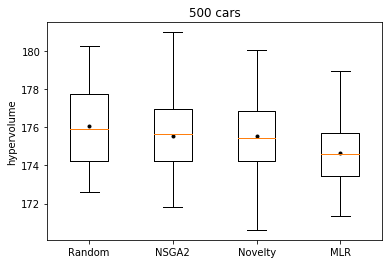

NSGA2	is not	 statistically significantly different than Random
Novelty	is not	 statistically significantly different than Random
Novelty	is not	 statistically significantly different than NSGA2
MLR	is	 statistically significantly different than Random
MLR	is not	 statistically significantly different than NSGA2
MLR	is not	 statistically significantly different than Novelty


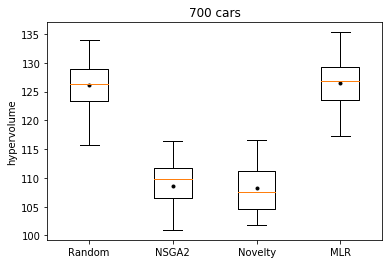

NSGA2	is	 statistically significantly different than Random
Novelty	is	 statistically significantly different than Random
Novelty	is not	 statistically significantly different than NSGA2
MLR	is not	 statistically significantly different than Random
MLR	is	 statistically significantly different than NSGA2
MLR	is	 statistically significantly different than Novelty


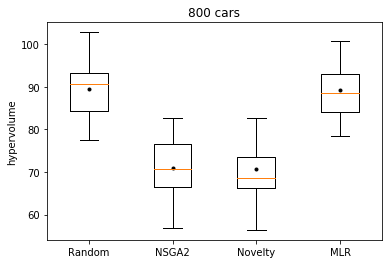

NSGA2	is	 statistically significantly different than Random
Novelty	is	 statistically significantly different than Random
Novelty	is not	 statistically significantly different than NSGA2
MLR	is not	 statistically significantly different than Random
MLR	is	 statistically significantly different than NSGA2
MLR	is	 statistically significantly different than Novelty


In [6]:
reference_point = [worst_avg_overhead, worst_avg_routing]
hyperVolume = HyperVolume(reference_point)
    
def compute_avg_hv(pfronts):
    hvs = []
    for pfront in pfronts:
        pfront_values = [[el["avg_overhead"], el["avg_routing"]] for el in pfront]
        hv = hyperVolume.compute(pfront_values)
        hvs.append(hv)
        
    return np.mean(hvs)


def compute_median_hv(pfronts, plotting=False):
    hvs = []
    for pfront in pfronts:
        pfront_values = [[el["avg_overhead"], el["avg_routing"]] for el in pfront]
        hv = hyperVolume.compute(pfront_values)
        hvs.append(hv)
        
    if plotting:
        fig,ax = plt.subplots()
        plt.hist(hvs, bins=30)  
        plt.ylabel('frequency')
        plt.xlabel('hypervolume')

        fig,ax = plt.subplots()
        ax.boxplot(hvs, 0, '', positions=range(1))
        ax.plot(["1"], np.mean(hvs), ".", label='mean', color='black', linestyle=':')
        plt.ylabel('hypervolume')
        
        plt.show() 
        
    return np.median(hvs)


def compute_hvs(pfronts):
    hvs = []
    for pfront in pfronts:
        pfront_values = [[el["avg_overhead"], el["avg_routing"]] for el in pfront]
        hv = hyperVolume.compute(pfront_values)
        hvs.append(hv)       
    return hvs


def compute_avg_objectives(pfronts):
    avg_overheads_of_runs = []
    avg_routings_of_runs = []
    for pfront in pfronts:
        avg_overheads = [el["avg_overhead"] for el in pfront]
        avg_overheads_of_runs.append(np.mean(avg_overheads))
        avg_routings = [el["avg_routing"] for el in pfront]
        avg_routings_of_runs.append(np.mean(avg_routings))
    return np.mean(avg_overheads_of_runs), np.mean(avg_routings_of_runs)


def compute_median_objectives(pfronts):
    avg_overheads_of_runs = []
    avg_routings_of_runs = []
    for pfront in pfronts:
        avg_overheads = [el["avg_overhead"] for el in pfront]
        avg_overheads_of_runs.append(np.mean(avg_overheads))
        avg_routings = [el["avg_routing"] for el in pfront]
        avg_routings_of_runs.append(np.mean(avg_routings))
    return np.median(avg_overheads_of_runs), np.median(avg_routings_of_runs)


def compute_avg_objectives_for_runs(pfronts, plotting=False):
    avg_overheads_of_runs = []
    avg_routings_of_runs = []
    for pfront in pfronts:
        avg_overheads = [el["avg_overhead"] for el in pfront]
        avg_overheads_of_runs.append(np.mean(avg_overheads))
        avg_routings = [el["avg_routing"] for el in pfront]
        avg_routings_of_runs.append(np.mean(avg_routings))
        
    if plotting:
        fig,ax = plt.subplots()
        ax.boxplot(avg_overheads_of_runs, 0, '', positions=range(1))
        ax.plot(["1"], np.mean(avg_overheads_of_runs), ".", label='mean', color='black', linestyle=':')
        plt.ylabel('overheads of trips')

        fig,ax = plt.subplots()
        ax.boxplot(avg_routings_of_runs, 0, '', positions=range(1))
        ax.plot(["1"], np.mean(avg_routings_of_runs), ".", label='mean', color='black', linestyle=':')
        plt.ylabel('routings of trips')
        
        fig,ax = plt.subplots()
        plt.hist(avg_overheads_of_runs, bins=30)  
        plt.ylabel('number of overheads')
        plt.xlabel('trip overhead')
        
        fig,ax = plt.subplots()
        plt.hist(avg_routings_of_runs, bins=30)  
        plt.ylabel('number of routing costs')
        plt.xlabel('routing costs')
           
        plt.show() 

    return avg_overheads_of_runs, avg_routings_of_runs


def compute_avg_utility(pfronts, normalize=True, plotting=False):
    all_utilities = []
    for pfront in pfronts:
        pfront_values = [[el["avg_overhead"], el["avg_routing"]] for el in pfront]
        utilities_of_one_front = []
        for solution in pfront_values:
            avg_overhead = solution[0]
            if normalize:
                avg_overhead = normalize_avg_overhead(avg_overhead)
            avg_routing = solution[1]
            if normalize:
                avg_routing = normalize_avg_routing(avg_routing)
            utility = avg_overhead + avg_routing
            utilities_of_one_front.append(utility)
        all_utilities.append(np.mean(utilities_of_one_front))
        
    if plotting:
        fig,ax = plt.subplots()
        ax.boxplot(all_utilities, 0, '', positions=range(1))
        ax.plot(["1"], np.mean(all_utilities), ".", label='mean', color='black', linestyle=':')
        plt.ylabel('utility')
        plt.show() 

    return np.mean(all_utilities)


def compute_median_utility(pfronts, normalize=True):
    all_utilities = []
    for pfront in pfronts:
        pfront_values = [[el["avg_overhead"], el["avg_routing"]] for el in pfront]
        utilities_of_one_front = []
        for solution in pfront_values:
            avg_overhead = solution[0]
            if normalize:
                avg_overhead = normalize_avg_overhead(avg_overhead)
            avg_routing = solution[1]
            if normalize:
                avg_routing = normalize_avg_routing(avg_routing)
            utility = avg_overhead + avg_routing
            utilities_of_one_front.append(utility)
        all_utilities.append(np.min(utilities_of_one_front))
    return np.median(all_utilities)


def normalize_avg_overhead(avg_overhead):
    result = (float(avg_overhead-best_avg_overhead))/(float(worst_avg_overhead-best_avg_overhead))
    # print("Overhead: " + str(avg_overhead) + " => " + str(result))
    if result < 0 or result > 1:
        print("ERROR")
    return result

def normalize_avg_routing(avg_routing):
    result = (float(avg_routing-best_avg_routing))/(float(worst_avg_routing-best_avg_routing))
    # print("Routing: " + str(avg_routing) + " => " + str(result))
    if result < 0 or result > 1:
        print("ERROR")
    return result


def plot_avg_hv(rtx_runs, run_to_all_individuals):       
    opt_method = ""
    if len(rtx_runs) > 0:
        try:
            opt_method = rtx_runs[0]["strategy"]["optimizer_method"]
        except:
            # mlr does not store the opt method name in field strategy.optimizer_method
            opt_method = "MLR"

    # set iterations
    set_iterations(opt_method)
    
    hv_series_of_all_runs = []
    for rtx_run in rtx_runs:
        rtx_run_id = rtx_run["id"]
        # get all individuals of the run
        all_individuals = run_to_all_individuals[rtx_run_id]
       
        hv_series = []          
        current_pareto_front = []
        for i in range(iterations):
            new_inds = [el for el in all_individuals if el["iteration"] == i]
            if not isinstance(new_inds, (list,)):
                new_inds = [new_inds]
            new_inds.extend(current_pareto_front)
            current_pareto_front = get_pareto_front(new_inds)
            current_pareto_front_values = [[el["avg_overhead"], el["avg_routing"]] 
                                           for el in current_pareto_front]
            hv = hyperVolume.compute(current_pareto_front_values)
            hv_series.append(hv)
            
        hv_series_of_all_runs.append(hv_series)
    
    a = np.array(hv_series_of_all_runs)
    avg_hv_series = a.mean(axis=0)
    
    fig, axes = plt.subplots()
    fig.suptitle('Evolution of the average Hypervolume for ' + str(opt_method), fontsize=16)    
    plt.ylabel('Hypervolume')
    plt.xlabel('Iteration') 
    
    plt.plot(range(iterations),avg_hv_series, color='black', label='Hypervolume')
    pylab.legend(loc='best')
    plt.show()

    
def check_avg(pfronts, name):
    print(name + ":\t" + str(compute_avg_hv(pfronts)) + "\t|" 
         + str(compute_median_hv(pfronts)) + "\t| " + str(compute_avg_utility(pfronts)) + "\t| " 
         + str(compute_median_utility(pfronts)) + "\t|"
         + str(compute_avg_objectives(pfronts)) + "\t| " + str(compute_median_objectives(pfronts)))


def plot_hypervolume_boxplots(random_pfronts, nsga2_pfronts, novelty_pfronts, mlr_pfronts, cars_number):
    hvs_random = compute_hvs(random_pfronts)
    hvs_nsga2 = compute_hvs(nsga2_pfronts)
    hvs_novelty = compute_hvs(novelty_pfronts)
    hvs_mlr = compute_hvs(mlr_pfronts)

    hvs = [hvs_random, hvs_nsga2, hvs_novelty, hvs_mlr]
    hvs_names = ["Random", "NSGA2", "Novelty", "MLR"]
    hvs_labels = range(1,5)

    fig,ax = plt.subplots()
    plt.title(str(cars_number) + " cars")
    ax.boxplot(hvs, 0, '', positions=hvs_labels)
    for i in range(len(hvs)):
        ax.plot(hvs_labels[i], np.mean(hvs[i]), ".", label='mean', color='black', linestyle=':')
    plt.xticks(hvs_labels, hvs_names) 
    plt.ylabel('hypervolume')
    plt.show() 
    
    from scipy import stats
    alpha = 0.05
    for i in range(len(hvs)):
        hvs_data_first = hvs[i]
        hvs_name_first = hvs_names[i]
        for j in range(len(hvs_names)):
            if j == i:
                break
            hvs_data_second = hvs[j]
            hvs_name_second = hvs_names[j]
            statistic, pvalue = stats.ttest_ind(hvs_data_first, hvs_data_second, equal_var = False)
            different_averages = bool(pvalue <= alpha)
            is_is_not = "\tis\t" if different_averages else "\tis not\t"
            print hvs_name_first + is_is_not + " statistically significantly different than " + hvs_name_second

print("Iterations considered: " + str(iterations))
print("Average Hypervolume (the higher, the better) | Median Hypervolume | Average utility (the lower, the better) | Median utility | Average objectives | Median objectives")

print("500 cars")
check_avg(random_500_pfronts, "Random")
compute_avg_objectives_for_runs(random_500_pfronts)
check_avg(mlr_500_pfronts, "MLR")
compute_avg_objectives_for_runs(mlr_500_pfronts)
check_avg(novelty_500_pfronts, "Novel")
compute_avg_objectives_for_runs(novelty_500_pfronts)
check_avg(nsga2_500_pfronts, "NSGAII")
compute_avg_objectives_for_runs(nsga2_500_pfronts)


# plot_avg_hv(mlr_rtx_runs_500, mlr_run_inds_500)
# plot_avg_hv(novelty_rtx_runs_500, novelty_run_inds_500)
# plot_avg_hv(nsga2_rtx_runs_500, nsga2_run_inds_500)

print("700 cars")
check_avg(random_700_pfronts, "Random")
compute_avg_objectives_for_runs(random_700_pfronts)
check_avg(mlr_700_pfronts, "MLR")
compute_avg_objectives_for_runs(mlr_700_pfronts)
check_avg(novelty_700_pfronts, "Novel")
compute_avg_objectives_for_runs(novelty_700_pfronts)
check_avg(nsga2_700_pfronts, "NSGAII")
compute_avg_objectives_for_runs(nsga2_700_pfronts)

# plot_avg_hv(mlr_rtx_runs_700, mlr_run_inds_700)
# plot_avg_hv(novelty_rtx_runs_700, novelty_run_inds_700)
# plot_avg_hv(nsga2_rtx_runs_700, nsga2_run_inds_700)

print("800 cars")
check_avg(random_800_pfronts, "Random")
compute_avg_objectives_for_runs(random_800_pfronts)
check_avg(mlr_800_pfronts, "MLR")
compute_avg_objectives_for_runs(mlr_800_pfronts)
check_avg(novelty_800_pfronts, "Novel")
compute_avg_objectives_for_runs(novelty_800_pfronts)
check_avg(nsga2_800_pfronts, "NSGAII")
compute_avg_objectives_for_runs(nsga2_800_pfronts)

# plot_avg_hv(mlr_rtx_runs_800, mlr_run_inds_800)
# plot_avg_hv(novelty_rtx_runs_800, novelty_run_inds_800)
# plot_avg_hv(nsga2_rtx_runs_800, nsga2_run_inds_800)


# ==========

plot_hypervolume_boxplots(random_500_pfronts, nsga2_500_pfronts, novelty_500_pfronts, mlr_500_pfronts, 500)
plot_hypervolume_boxplots(random_700_pfronts, nsga2_700_pfronts, novelty_700_pfronts, mlr_700_pfronts, 700)
plot_hypervolume_boxplots(random_800_pfronts, nsga2_800_pfronts, novelty_800_pfronts, mlr_800_pfronts, 800)



# hvs_random_500 = compute_hvs(random_500_pfronts)
# hvs_nsga2_500 = compute_hvs(nsga2_500_pfronts)
# hvs_novelty_500 = compute_hvs(novelty_500_pfronts)
# hvs_mlr_500 = compute_hvs(mlr_500_pfronts)

# hvs_500 = [hvs_random_500, hvs_nsga2_500, hvs_novelty_500, hvs_mlr_500]
# hvs_500_names = ["Random", "NSGA2", "Novelty", "MLR"]
# hvs_labels = range(1,5)

# fig,ax = plt.subplots()
# plt.title("500 cars")
# ax.boxplot(hvs_500, 0, '', positions=hvs_labels)
# for i in range(len(hvs_500)):
#     ax.plot(hvs_labels[i], np.mean(hvs_500[i]), ".", label='mean', color='black', linestyle=':')
# plt.xticks(hvs_labels, hvs_500_names) 
# plt.ylabel('hypervolume')
# plt.show() 


## Analysis over multiple runs

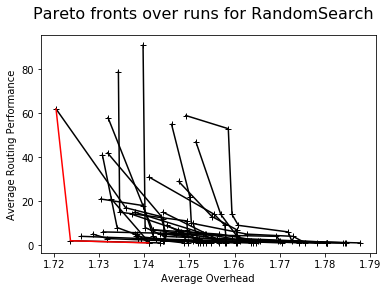

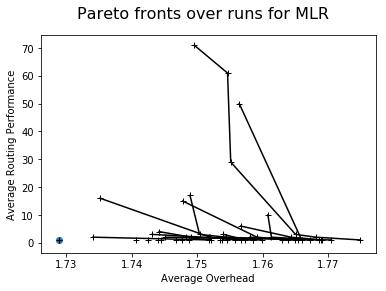

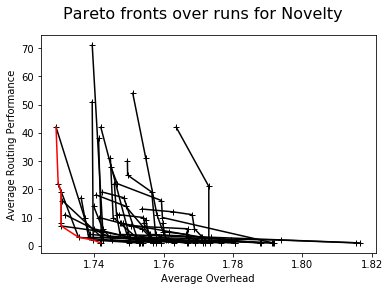

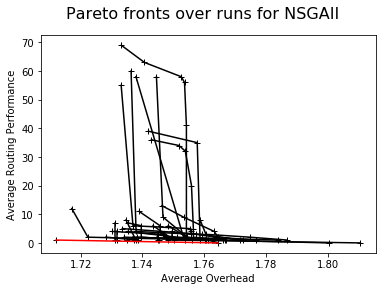

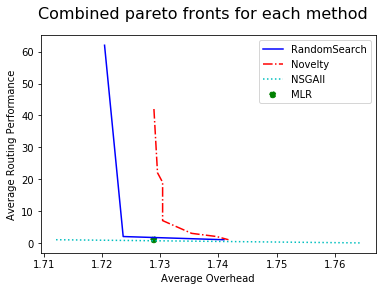

In [36]:
def plot_pfronts_over_runs(pfronts, combined_pront, method_name):
    fig, axes = plt.subplots()
    plt.ylabel('Average Routing Performance')
    plt.xlabel('Average Overhead')
    # axes.grid(True)
    fig.suptitle("Pareto fronts over runs for " + method_name, fontsize=16)
    for pfront in pfronts:
        avg_o = [el["avg_overhead"] for el in pfront]
        avg_p = [el["avg_routing"] for el in pfront] 
        plt.plot(avg_o,avg_p, marker="+", color='black', label='')

    p_front_avg_o = [el["avg_overhead"] for el in combined_pront]
    p_front_avg_p = [el["avg_routing"] for el in combined_pront] 
    if len(combined_pront) > 1:
        plt.plot(p_front_avg_o, p_front_avg_p, label="Pareto Front over all runs", color='red')
    else:
        plt.scatter(p_front_avg_o, p_front_avg_p, label="Pareto Front over all runs")
    # pylab.legend(loc='best')
    #for i,j in zip(avg_o,avg_p):
    #    axes.annotate(str(i)+", "+str(j),xy=(i,j))
    

def plot_combined_pfronts_over_methods(combined_pfronts, method_names, line_styles, colors):
    fig, axes = plt.subplots()
    plt.ylabel('Average Routing Performance')
    plt.xlabel('Average Overhead')
    # axes.grid(True)
    fig.suptitle("Combined pareto fronts for each method", fontsize=16)
    for i in range(len(combined_pfronts)):
        avg_o = [el["avg_overhead"] for el in combined_pfronts[i]]
        avg_p = [el["avg_routing"] for el in combined_pfronts[i]] 
        if len(combined_pfronts[i]) > 1:
            plt.plot(avg_o, avg_p, linestyle=line_styles[i], color=colors[i], label=method_names[i])
        else:
            plt.scatter(avg_o, avg_p, linestyle=line_styles[i], color=colors[i], label=method_names[i])
    pylab.legend(loc='best')

# Analyze pareto fronts over runs    

# Random Search
random_500_pfronts_flat = [ind for p_front in random_500_pfronts for ind in p_front]
random_500_combined_pfront = get_pareto_front(random_500_pfronts_flat)
plot_pfronts_over_runs(random_500_pfronts, random_500_combined_pfront, "RandomSearch")

# MLR
mlr_500_pfronts_flat = [ind for p_front in mlr_500_pfronts for ind in p_front]
mlr_500_combined_pfront = get_pareto_front(mlr_500_pfronts_flat)
plot_pfronts_over_runs(mlr_500_pfronts, mlr_500_combined_pfront, "MLR")

# Novelty
novelty_500_pfronts_flat = [ind for p_front in novelty_500_pfronts for ind in p_front]
novelty_500_combined_pfront = get_pareto_front(novelty_500_pfronts_flat)
plot_pfronts_over_runs(novelty_500_pfronts, novelty_500_combined_pfront, "Novelty")

# NSGA2
nsga2_500_pfronts_flat = [ind for p_front in nsga2_500_pfronts for ind in p_front]
nsga2_500_combined_pfront = get_pareto_front(nsga2_500_pfronts_flat)
plot_pfronts_over_runs(nsga2_500_pfronts, nsga2_500_combined_pfront, "NSGAII")


###
combined_pfronts_500 = [random_500_combined_pfront, mlr_500_combined_pfront, novelty_500_combined_pfront, nsga2_500_combined_pfront]

#combined_500_pfronts_flat = [ind for p_front in combined_pfronts_500 for ind in p_front]
#reference_front_500 = get_pareto_front(combined_500_pfronts_flat)
#combined_pfronts_500.append(reference_front_500)

method_names = ["RandomSearch", "MLR", "Novelty", "NSGAII"]
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'c']
plot_combined_pfronts_over_methods(combined_pfronts_500, method_names, line_styles, colors)


## Testing

In [ ]:

'''
Method to take two equally-sized lists and return just the elements which lie 
on the Pareto frontier, sorted into order.
Default behaviour is to find the maximum for both X and Y, but the option is
available to specify maxX = False or maxY = False to find the minimum for either
or both of the parameters.
'''
def pareto_frontier(Xs, Ys, maxX = False, maxY = False):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y… 
                p_front.append(pair) # … and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y…    
                p_front.append(pair) # … and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY



l = [["ind1", 3.00, 12], ["ind2", 2.23, 13], ["ind3", 4.5, 15]]
print(l)
Is = [el[0] for el in l]
Xs = [el[1] for el in l]
Ys = [el[2] for el in l]
print(Xs)
print(Ys)

pfront = pareto_frontier(Xs, Ys)
print(pfront)
s = zip(pfront[0], pfront[1])
for e in s:
    print(str(e[0]) + " " + str(e[1]))
    
unsorted_list = [['a','b','c','5','d'],['e','f','g','3','h'],['i','j','k','4','m']]
print(unsorted_list)
unsorted_list.sort(key=lambda x: x[3], reverse=False)
print(unsorted_list)

In [ ]:
import numpy as np
a = np.array([[40, 10], [50, 11]])
m1 = a.mean(axis=1)     # to take the mean of each row
print(m1)
m2 = a.mean(axis=0)     # to take the mean of each col
print(m2)